In [2]:
# QUESTO PER EMODB!!!!
#
#  creare csv con file path e path audio corrispondente CON BABELE
# dataset è composto da video_path, audio_path (estratto), label {0: eng, 1: ita, 2: sp, 3: fr}

import os
import glob
import subprocess
import torch

os.environ["ACCELERATE_MIXED_PRECISION"] = "no"
os.environ.pop("USE_FP16", None)
os.environ.setdefault("PYTORCH_MPS_HIGH_WATERMARK_RATIO", "0.0")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Device: {device}")

dataset_dir = "/Volumes/Crucial X9/EMODB"
audio_dir   = os.path.join("NEWEMODB/audio_wav")
csv_path    = os.path.join("NEWEMODB/dataset.csv")
os.makedirs(audio_dir, exist_ok=True)

video_paths = glob.glob(os.path.join(dataset_dir, "**/*.mp4"), recursive=True) + \
              glob.glob(os.path.join(dataset_dir, "**/*.MOV"), recursive=True)

rows = []
for vp in video_paths:
    if   "EN" in vp: label = 0
    elif "IT" in vp: label = 1
    #elif "French"  in vp: label = 3
    elif "SP" in vp: label = 2
    else:
        print("Lingua non riconosciuta → salto:", vp)
        continue

    fname = os.path.splitext(os.path.basename(vp))[0]
    wav   = os.path.join(audio_dir, f"{fname}{label}language.wav")

    if not os.path.exists(wav):
        res = subprocess.run(
            ["ffmpeg", "-i", vp, "-ar", "16000", "-ac", "1",
             "-f", "wav", "-vn", wav],
            stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL
        )
        if res.returncode != 0:
            print("ffmpeg errore → salto:", vp)
            continue        # non appendere se fallita conversione

    rows.append({"audio_path": wav, "video_path": vp, "label": label})


if not os.path.exists(csv_path):
    import pandas as pd
    pd.DataFrame(rows).to_csv(csv_path, index=False)
    print(f"CSV creato: {csv_path}")




Device: mps
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 4/115/115_f_32_4_5_OT.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 4/115/115_f_32_4_6_OT.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 4/115/115_f_32_4_3_OT.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 4/115/115_f_32_4_1_OT.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 4/115/115_f_32_4_0_OT.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 4/115/115_f_32_4_4_OT.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 4/115/115_f_32_4_2_OT.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 4/002/VID20230426143437.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 4/002/VID20230426143418.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 4/013/013_f_028_1_0_BA_4.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X

In [15]:
# QUESTO PER EMODB - prendere sessione 2 solo con i video in italiano e in spagnolo!!!!
#
#  creare csv con file path e path audio corrispondente CON BABELE
# dataset è composto da video_path, audio_path (estratto), label {0: eng, 1: ita, 2: sp, 3: fr}

import os
import glob
import subprocess
import torch

os.environ["ACCELERATE_MIXED_PRECISION"] = "no"
os.environ.pop("USE_FP16", None)
os.environ.setdefault("PYTORCH_MPS_HIGH_WATERMARK_RATIO", "0.0")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Device: {device}")

dataset_dir = "/Volumes/Crucial X9/EMODB/Session 2"
audio_dir   = os.path.join("NEWEMODB/audio_wav")
csv_path    = os.path.join("NEWEMODB/dataset_noeng.csv")
os.makedirs(audio_dir, exist_ok=True)

video_paths = glob.glob(os.path.join(dataset_dir, "**/*.mp4"), recursive=True) + \
              glob.glob(os.path.join(dataset_dir, "**/*.MOV"), recursive=True)

rows = []
for vp in video_paths:
    #if   "EN" in vp: label = 0
    if "IT" in vp: label = 1
    #elif "French"  in vp: label = 3
    elif "SP" in vp: label = 2
    else:
        print("Lingua non riconosciuta → salto:", vp)
        continue

    fname = os.path.splitext(os.path.basename(vp))[0]
    wav   = os.path.join(audio_dir, f"{fname}{label}language.wav")

    if not os.path.exists(wav):
        res = subprocess.run(
            ["ffmpeg", "-i", vp, "-ar", "16000", "-ac", "1",
             "-f", "wav", "-vn", wav],
            stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL
        )
        if res.returncode != 0:
            print("ffmpeg errore → salto:", vp)
            continue        # non appendere se fallita conversione

    rows.append({"audio_path": wav, "video_path": vp, "label": label})


if not os.path.exists(csv_path):
    import pandas as pd
    pd.DataFrame(rows).to_csv(csv_path, index=False)
    print(f"CSV creato: {csv_path}")




Device: mps
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 2/035/035_m_022_0_5_EN_2.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 2/035/035_m_022_0_0_EN_2.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 2/035/035_m_022_0_6_EN_2.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 2/035/035_m_022_0_2_EN_2.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 2/035/035_m_022_0_3_EN_2.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 2/035/035_m_022_0_1_EN_2.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 2/035/035_m_022_0_4_EN_2.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 2/120/120_m_29_2_0_EN.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 2/120/120_m_29_2_1_EN.mp4
Lingua non riconosciuta → salto: /Volumes/Crucial X9/EMODB/Session 2/120/120_m_29_2_5_EN.mp4
Lingua non riconosciuta → salto: /Vol

In [39]:
#!/usr/bin/env python3
# build_vidtimit_csv.py
# Crea NEWEMODB/dataset.csv con: video_path (cartella frame), audio_path (.wav), label=0

import os, glob
import pandas as pd

# ---- Config ----
VIDTIMIT_ROOT = "VidTIMIT/"         
OUT_DIR       = "VidTIMIT/"
CSV_OUT       = os.path.join(OUT_DIR, "dataset.csv")
os.makedirs(OUT_DIR, exist_ok=True)

rows = []

# Assunzione struttura:
# VidTIMIT/<speaker>/audio/si649.wav
# VidTIMIT/<speaker>/video/si649/001 002 003 ...
spk_dirs = sorted([d for d in glob.glob(os.path.join(VIDTIMIT_ROOT, "*")) if os.path.isdir(d)])

def has_frames(folder: str) -> bool:
    # al minimo 1 file dentro (anche senza estensione)
    try:
        return any(os.path.isfile(os.path.join(folder, f)) for f in os.listdir(folder))
    except FileNotFoundError:
        return False

for spk in spk_dirs:
    audio_dir = os.path.join(spk, "audio")
    video_dir = os.path.join(spk, "video")
    if not (os.path.isdir(audio_dir) and os.path.isdir(video_dir)):
        continue

    wavs = sorted(glob.glob(os.path.join(audio_dir, "*.wav")))
    for wav in wavs:
        stem = os.path.splitext(os.path.basename(wav))[0]  # es: si649
        frame_folder = os.path.join(video_dir, stem)
        if not has_frames(frame_folder):
            print(f"[WARN] Niente frame per {wav} → skip")
            continue

        rows.append({
            "audio_path": wav,            # .wav allineato
            "video_path": frame_folder,   # cartella con i frame
            "label": 0                    # VidTIMIT = inglese
        })

assert rows, "Non ho trovato coppie audio+frame."
pd.DataFrame(rows).to_csv(CSV_OUT, index=False)
print(f"✅ CSV creato: {CSV_OUT}  ({len(rows)} righe)")


✅ CSV creato: VidTIMIT/dataset.csv  (98 righe)


In [37]:
import re
import pandas as pd

it_cont = 0
sp_cont = 0

df = pd.read_csv('/Users/ludovicagenovese/Documents/GitHub/mothertongueVSspoken/NEWEMODB/dataset_filtrato.csv')
df = pd.DataFrame(df)
df.drop_duplicates(inplace=True)

print(df['label'].value_counts())
df['persona'] = df['audio_path'].apply(lambda x: re.search(r'audio_wav/(\d+)', x).group(1))

cont = df.groupby('label')['persona'].nunique()


print(cont)



label
1    98
2    97
Name: count, dtype: int64
label
1    14
2    14
Name: persona, dtype: int64


In [35]:
import pandas as pd
import re
import random


df = pd.read_csv('NEWEMODB/dataset_noeng.csv')
df.drop_duplicates(inplace=True)


df['persona'] = df['audio_path'].apply(lambda x: re.search(r'audio_wav/(\d+)', x).group(1))

persone_label1 = df.loc[df['label'] == 1, 'persona'].unique()

persone_label1_scelte = random.sample(list(persone_label1), 14)

df_filtrato = df[( (df['label'] == 1) & (df['persona'].isin(persone_label1_scelte)) ) | (df['label'] == 2)]

df_filtrato.to_csv('dataset_filtrato.csv', index=False)

print(f"Persone con label 1 scelte: {persone_label1_scelte}")
print("File salvato come dataset_filtrato.csv")


Persone con label 1 scelte: ['002', '035', '021', '009', '034', '036', '026', '010', '016', '012', '024', '004', '032', '022']
File salvato come dataset_filtrato.csv


In [42]:
import whisper, torch, soundfile as sf, json, numpy as np, pandas as pd
from pathlib import Path
from tqdm import tqdm

# ───── Config ─────────────────────────────────────────────
MODEL   = "small"
SR      = 16000
CLIP_S  = 10
CLIP_N  = CLIP_S * SR
CSV_IN  = "NEWEMODB/dataset_filtrato.csv"            # video_path,audio_path,label
CSV_OUT = "NEWEMODB/distillation_dataset_filtrato.csv"
id2lang = {0: "en", 1: "it", 2: "es"}

# ───── Load Whisper una sola volta ───────────────────────
model  = whisper.load_model(MODEL)
device = model.device

# ───── Utility: verifica se i 3 file di output esistono ──
def already_done(wav: str) -> bool:
    return all(Path(wav + suff).is_file() for suff in
               (".hid.npy", ".feat.npy", ".probs.json"))

# ───── Main loop ─────────────────────────────────────────
rows = []
ds = pd.read_csv(CSV_IN)

for vid, wav, lbl in tqdm(ds[["video_path","audio_path","label"]].values,
                          total=len(ds), desc="Teacher"):

    # ↓ Lenght del file senza caricarlo in RAM
    n_frames = sf.info(wav).frames
    mid      = n_frames // 2
    start    = max(mid - CLIP_N // 2, 0)
    end      = min(start + CLIP_N, n_frames)

    hid_path   = wav + ".hid.npy"
    feats_path = wav + ".feat.npy"
    probs_path = wav + ".probs.json"

    if already_done(wav):
        # File già processato → salta inferenza
        rows.append([vid, wav, json.dumps([(start / SR, end / SR)]),
                     probs_path, hid_path, feats_path, id2lang[lbl]])
        continue

    # ───── Pipeline completa (solo se non ancora fatto) ───
    audio, sr = sf.read(wav)
    if sr != SR:
        raise ValueError(f"{wav}: samplerate ≠ {SR} Hz")
    if audio.ndim == 2:
        audio = audio.mean(axis=1)

    clip = torch.from_numpy(audio[start:end]).float().to(device)
    clip = whisper.pad_or_trim(clip)               # esattamente 10 s

    mel = whisper.log_mel_spectrogram(clip).to(device)
    with torch.no_grad():
        _, probs = model.detect_language(mel)
        enc      = model.encoder(mel.unsqueeze(0))

    enc_seq = enc.squeeze(0).cpu().numpy()         # [T, 768]
    emb     = enc_seq.mean(0)                      # [768]

    s = probs["en"] + probs["it"] + probs["es"]
    probs3 = {k: float(probs[k] / s) for k in ("en", "it", "es")}

    np.save(hid_path,  emb)
    np.save(feats_path, enc_seq)
    json.dump(probs3, open(probs_path, "w"))

    rows.append([vid, wav, json.dumps([(start / SR, end / SR)]),
                 probs_path, hid_path, feats_path, id2lang[lbl]])

# ───── Export manifest ───────────────────────────────────
pd.DataFrame(rows,
    columns=["video_path","audio_path","segments",
             "probs_path","hid_path","feats_path","label"]
).to_csv(CSV_OUT, index=False)

print("✅  Manifest scritto in", CSV_OUT)


Teacher: 100%|██████████| 195/195 [00:00<00:00, 4518.88it/s]

✅  Manifest scritto in NEWEMODB/distillation_dataset_filtrato.csv


In [41]:
#!/usr/bin/env python3
import json, numpy as np, pandas as pd
import whisper, torch, soundfile as sf
from pathlib import Path
from tqdm import tqdm
import os
import scipy.signal

# ── Config ─────────────────────────────────────────────
MODEL   = "small"
SR      = 16000
CLIP_S  = 10
CLIP_N  = CLIP_S * SR
CSV_IN  = "VidTIMIT/dataset.csv"
CSV_OUT = "VidTIMIT/distillation_dataset.csv"
id2lang = {0: "en", 1: "it", 2: "es"}

# ── Load Whisper una sola volta ───────────────────────
model  = whisper.load_model(MODEL)
device = model.device

def already_done(wav: str) -> bool:
    return all(Path(wav + suff).is_file() for suff in
               (".hid.npy", ".feat.npy", ".probs.json"))

rows = []
ds = pd.read_csv(CSV_IN)

for vid, wav, lbl in tqdm(ds[["video_path","audio_path","label"]].values,
                          total=len(ds), desc="Teacher"):

    n_frames = sf.info(wav).frames
    sr_orig  = sf.info(wav).samplerate
    mid      = n_frames // 2
    start    = max(mid - CLIP_N // 2, 0)
    end      = min(start + CLIP_N, n_frames)

    hid_path   = wav + ".hid.npy"
    feats_path = wav + ".feat.npy"
    probs_path = wav + ".probs.json"

    if already_done(wav):
        rows.append([vid, wav, json.dumps([(start / SR, end / SR)]),
                     probs_path, hid_path, feats_path, id2lang[int(lbl)]])
        continue

    audio, sr = sf.read(wav)
    if audio.ndim == 2:
        audio = audio.mean(axis=1)

    if sr != SR:
        gcd = np.gcd(sr, SR)
        audio = scipy.signal.resample_poly(audio, SR // gcd, sr // gcd)
        sr = SR

    clip = torch.from_numpy(audio[start:end]).float().to(device)
    clip = whisper.pad_or_trim(clip)

    mel = whisper.log_mel_spectrogram(clip).to(device)
    with torch.no_grad():
        _, probs = model.detect_language(mel)
        enc      = model.encoder(mel.unsqueeze(0))

    enc_seq = enc.squeeze(0).cpu().numpy()
    emb     = enc_seq.mean(0)

    s = probs["en"] + probs.get("it",0) + probs.get("es",0)
    probs3 = {"en": float(probs["en"]/s), "it": float(probs.get("it",0)/s), "es": float(probs.get("es",0)/s)}

    np.save(hid_path,  emb)
    np.save(feats_path, enc_seq)
    json.dump(probs3, open(probs_path, "w"))

    rows.append([vid, wav, json.dumps([(start / SR, end / SR)]),
                 probs_path, hid_path, feats_path, id2lang[int(lbl)]])

pd.DataFrame(rows,
    columns=["video_path","audio_path","segments",
             "probs_path","hid_path","feats_path","label"]
).to_csv(CSV_OUT, index=False)

print("✅ Manifest scritto in", CSV_OUT)


python(41575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Teacher: 100%|██████████| 98/98 [01:36<00:00,  1.02it/s]

✅ Manifest scritto in VidTIMIT/distillation_dataset.csv


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Whisper teacher per KD L2 multi-livello — preserva TUTTE le colonne (es. 'mouth_path')
Aggiunge:
- probs_path (JSON con p_en/it/es normalizzate)
- hid_path (embedding medio finale)
- feats_path (sequenza hidden finale T×D)
- layer10_mean_path (media penultimo blocco)
- layer11_mean_path (media finale encoder)
"""

import os, json
from typing import Tuple, Dict
import numpy as np
import pandas as pd
import soundfile as sf
from tqdm import tqdm
import torch
import whisper

# ===== Config =====
MODEL       = "small"
SR          = 16000
CLIP_S      = 10

CSV_IN      = "BABELE/distillation_dataset.csv"       # contiene mouth_path
CSV_OUT     = None                               # None => sovrascrive CSV_IN; altrimenti scrive qui

SAVE_MODE   = "append"                           # "append" | "outdir"
OUT_DIR     = "teacher_features"

AUDIO_COL   = "audio_path"
MOUTH_COL   = "mouth_path"                       # non toccata
LANG_SUBSET = ["en", "it", "es"]

# ===== Utils =====
def ensure_dir(path: str) -> None:
    d = os.path.dirname(path)
    if d and not os.path.exists(d):
        os.makedirs(d, exist_ok=True)

def central_clip(audio: np.ndarray, sr: int, target_len_s: int) -> Tuple[np.ndarray, int, int]:
    n_target = target_len_s * sr
    mid = len(audio) // 2
    start = max(mid - n_target // 2, 0)
    end = min(start + n_target, len(audio))
    return audio[start:end], start, end

def detect_lang_and_encode(model, mel: torch.Tensor) -> Tuple[Dict[str, float], torch.Tensor]:
    with torch.no_grad():
        _, probs = model.detect_language(mel)
        enc = model.encoder(mel.unsqueeze(0))  # [1,T',D]
    return probs, enc

# ===== Main =====
def main():
    df = pd.read_csv(CSV_IN)

    # Verifica che mouth_path esista e venga mantenuta
    if MOUTH_COL not in df.columns:
        print(f"Avviso: '{MOUTH_COL}' non è nel CSV. Procedo comunque, ma non posso 'preservarla'.")
    assert AUDIO_COL in df.columns, f"Colonna '{AUDIO_COL}' assente."

    model = whisper.load_model(MODEL)
    device = model.device

    # Hook penultimo blocco per L10
    assert len(model.encoder.blocks) >= 2, "Modello Whisper privo di sufficienti blocchi."
    mid_cache = {}
    def _mid_hook(m, i, o): mid_cache["x"] = o.detach()
    h_mid = model.encoder.blocks[-2].register_forward_hook(_mid_hook)

    probs_paths, hid_paths, feats_paths, l10_paths, l11_paths = [], [], [], [], []

    for _, row in tqdm(df.iterrows(), total=len(df), desc="Teacher"):
        wav = str(row[AUDIO_COL])
        p_probs = p_hid = p_feats = p_l10 = p_l11 = np.nan
        try:
            audio, sr = sf.read(wav)
            if sr != SR: raise ValueError(f"{wav}: SR {sr} != {SR}")
            if audio.ndim == 2: audio = audio.mean(axis=1)

            clip, _, _ = central_clip(audio, sr, CLIP_S)
            clip_t = torch.from_numpy(clip).float().to(device)
            clip_t = whisper.pad_or_trim(clip_t)
            mel = whisper.log_mel_spectrogram(clip_t).to(device)

            mid_cache.clear()
            probs_all, enc = detect_lang_and_encode(model, mel)
            enc_seq = enc.squeeze(0).cpu().numpy()         # [T',D]
            emb = enc_seq.mean(0)                          # [D]

            if "x" not in mid_cache: raise RuntimeError("Hook non ha catturato L10.")
            l10_seq = mid_cache["x"].squeeze(0).cpu().numpy()
            l10 = l10_seq.mean(0)
            l11 = emb

            s = sum(float(probs_all.get(k, 0.0)) for k in LANG_SUBSET)
            probs_sub = ({k: 1.0/len(LANG_SUBSET) for k in LANG_SUBSET} if s<=0.0
                         else {k: float(probs_all.get(k, 0.0)/s) for k in LANG_SUBSET})

            if SAVE_MODE == "append":
                base = wav
                p_probs = base + ".probs.json"
                p_hid   = base + ".hid.npy"
                p_feats = base + ".feat.npy"
                p_l10   = base + ".layer10_mean.npy"
                p_l11   = base + ".layer11_mean.npy"
            else:
                base_id = os.path.splitext(os.path.basename(wav))[0]
                p_probs = os.path.join(OUT_DIR, "probs", f"{base_id}.json")
                p_hid   = os.path.join(OUT_DIR, "hid",   f"{base_id}.npy")
                p_feats = os.path.join(OUT_DIR, "feats", f"{base_id}.npy")
                p_l10   = os.path.join(OUT_DIR, "L10",   f"{base_id}.npy")
                p_l11   = os.path.join(OUT_DIR, "L11",   f"{base_id}.npy")

            for p in [p_probs, p_hid, p_feats, p_l10, p_l11]: ensure_dir(p)
            with open(p_probs, "w") as f: json.dump(probs_sub, f)
            np.save(p_hid,   emb.astype("float32"))
            np.save(p_feats, enc_seq.astype("float32"))
            np.save(p_l10,   l10.astype("float32"))
            np.save(p_l11,   l11.astype("float32"))
        except Exception:
            pass

        probs_paths.append(p_probs); hid_paths.append(p_hid)
        feats_paths.append(p_feats); l10_paths.append(p_l10); l11_paths.append(p_l11)

    h_mid.remove()

    # Aggiunge le nuove colonne SENZA rimuovere le esistenti (mouth_path inclusa)
    df["probs_path"]        = probs_paths
    df["hid_path"]          = hid_paths
    df["feats_path"]        = feats_paths
    df["layer10_mean_path"] = l10_paths
    df["layer11_mean_path"] = l11_paths

    out_csv = CSV_OUT or CSV_IN
    os.makedirs(os.path.dirname(out_csv) or ".", exist_ok=True)
    df.to_csv(out_csv, index=False)

    # Check: la colonna mouth_path deve essere ancora presente
    if MOUTH_COL in df.columns:
        print("OK: 'mouth_path' è ancora presente ed è stata preservata.")
    else:
        print("Nota: 'mouth_path' non era nel CSV di input.")

    cover = df["layer10_mean_path"].notna() & df["layer11_mean_path"].notna()
    print(f"✅ CSV scritto: {out_csv}")
    print(f"   Coverage L10&L11: {cover.mean()*100:.1f}% su {len(df)} righe")

if __name__ == "__main__":
    main()


In [54]:
import os, cv2, json, numpy as np, pandas as pd
from tqdm import tqdm
import face_alignment
from face_alignment import FaceAlignment

def mouth_roi(frame, landmarks, size=96, scale=1.4):
    h_frame, w_frame = frame.shape[:2]
    pts = landmarks[48:68]
    cx, cy = pts.mean(axis=0)
    w = max(np.ptp(pts[:,0]), np.ptp(pts[:,1])) * scale
    x1 = max(0, int(cx - w/2)); y1 = max(0, int(cy - w/2))
    x2 = min(w_frame, int(cx + w/2)); y2 = min(h_frame, int(cy + w/2))
    if x2 <= x1 or y2 <= y1: return None
    crop = frame[y1:y2, x1:x2]
    if crop.size == 0: return None
    return cv2.resize(crop, (size, size))

# Inizializza
fa      = FaceAlignment(face_alignment.LandmarksType.TWO_D, device="cpu")
distill = "NEWEMODB/distillation_dataset_filtrato.csv"
out_dir = "NEWEMODB/video_path"
os.makedirs(out_dir, exist_ok=True)

mani = pd.read_csv(distill, dtype={"segments": str})

# 1) Pre-calcola il numero totale di frame da processare (sommando tutti i segmenti di tutti i video)
def frames_in_video(video_path, segments, fps):
    return sum(max(0, int((e - s) * fps)) for s, e in segments)

total_frames_all = 0
fps_cache = {}
segments_cache = {}

for _, row in mani.iterrows():
    video_path = row["video_path"]
    segments = json.loads(row["segments"])
    segments_cache[video_path] = segments
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS) or 25
    cap.release()
    fps_cache[video_path] = fps
    total_frames_all += frames_in_video(video_path, segments, fps)

mouth_paths = []
pbar = tqdm(total=total_frames_all, desc="Elaborazione totale", unit="frame",
            mininterval=0.3, miniters=10, leave=False, dynamic_ncols=True)

for idx, row in mani.iterrows():
    video_path = row["video_path"]
    outp = os.path.join(out_dir, os.path.basename(video_path) + ".npy")

    if os.path.exists(outp):
        mouth_paths.append(outp)
        # Avanza comunque la barra globale del numero di frame teorici di questo video
        pbar.set_description(f"Skip {os.path.basename(video_path)}")
        pbar.update(frames_in_video(video_path, segments_cache[video_path], fps_cache[video_path]))
        continue

    segments = segments_cache[video_path]
    fps      = fps_cache[video_path]
    frames   = []

    cap = cv2.VideoCapture(video_path)
    pbar.set_description(f"Video {idx+1}/{len(mani)}: {os.path.basename(video_path)}")

    for start_s, end_s in segments:
        start_f = int(start_s * fps)
        end_f   = int(end_s   * fps)
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_f)

        for _ in range(start_f, end_f):
            ok, frame = cap.read()
            if not ok:
                # se fallisce la lettura, consideriamo il frame “consumato” per non bloccare la barra
                pbar.update(1)
                continue
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            lm = fa.get_landmarks(frame)
            if lm and len(lm) > 0:
                roi = mouth_roi(frame, lm[0])
                if roi is not None:
                    frames.append(roi)
            pbar.update(1)

    cap.release()

    if frames:
        arr = np.stack(frames).astype("uint8")
        np.save(outp, arr)
        mouth_paths.append(outp)
    else:
        mouth_paths.append("")

pbar.close()

# Aggiorna manifest
mani["mouth_path"] = mouth_paths
mani.to_csv(distill, index=False)
print("Manifest aggiornato.")


Manifest aggiornato.


Video: 100%|██████████| 98/98 [1:16:21<00:00, 46.75s/it] 

✅ Manifest aggiornato: VidTIMIT/distillation_dataset.csv


In [33]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
from pathlib import Path

MANIFEST_PATH = "NEWEMODB/manifest_test.csv"
DISTILLATION_PATH = "NEWEMODB/distillation_dataset.csv"
OUT_PATH = "NEWEMODB/manifest_test_session1.csv"  # <-- output minimale

def parse_vid_base(name: str):
    if not isinstance(name, str):
        return None
    try:
        stem, ext = name.rsplit('.', 1)
    except ValueError:
        stem, ext = name, ""
    parts = stem.split('_')
    if len(parts) == 7:
        subj, gender, age, _zero, emo, lang, session = parts
    elif len(parts) == 6:
        subj, gender, age, session, emo, lang = parts
    else:
        return None
    age = age.lstrip('0') or "0"
    return (subj, gender, age, emo, lang, session.upper()), ext.upper()

def main():
    man = pd.read_csv(MANIFEST_PATH, dtype=str, keep_default_na=False, na_values=[])
    dist = pd.read_csv(DISTILLATION_PATH, dtype=str, keep_default_na=False, na_values=[])

    # Lookup dist per chiave strutturata (sessione inclusa)
    dist["__vid_base"] = dist["video_path"].apply(lambda p: Path(p).name)
    dist["__parsed"] = dist["__vid_base"].apply(parse_vid_base)
    lut = {}
    for _, row in dist.iterrows():
        parsed = row["__parsed"]
        if parsed is None:
            continue
        key, _ext = parsed
        lut[key] = row

    def is_sess2(v):
        t = str(v).lower()
        return ("session 2" in t) or ("/s2/" in t) or ("session2" in t) or ("_s2" in t) or ("-s2" in t)

    sess2_mask = man["video_path"].apply(is_sess2)
    man["__vid_base"] = man["video_path"].apply(lambda p: Path(p).name)

    # Copiamo SOLO le colonne presenti in distillation_dataset
    keep_cols = ["video_path","audio_path","segments","probs_path","hid_path","feats_path","label"]
    out = pd.DataFrame(columns=keep_cols, index=man.index)
    # Pre-riempiamo con i valori originali dove presenti (per i non-NEWEMODB)
    for c in keep_cols:
        if c in man.columns:
            out[c] = man[c]

    replaced = 0
    for idx, r in man[sess2_mask].iterrows():
        parsed = parse_vid_base(r["__vid_base"])
        if parsed is None:
            continue
        (subj, gender, age, emo, lang, _session), _ext = parsed
        key_s1 = (subj, gender, age, emo, lang, "1")
        src = lut.get(key_s1)
        if src is None:
            continue
        for c in keep_cols:
            out.at[idx, c] = src.get(c, "")
        replaced += 1

    out.to_csv(OUT_PATH, index=False)
    print(f"Righe Session 2 sostituite con Session 1 (da distillation): {replaced}")
    print(f"Manifest minimale scritto in: {OUT_PATH}")

if __name__ == "__main__":
    main()


Righe Session 2 sostituite con Session 1 (da distillation): 56
Manifest minimale scritto in: NEWEMODB/manifest_test_session1.csv


In [34]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Aggiorna IN-PLACE un CSV aggiungendo/riempiendo la colonna 'mouth_path'.
- Legge il CSV indicato
- Usa la colonna video (di default 'video_path'; cambia VIDEO_COL se diverso)
- Estrae un .npy (fallback semplice) per ogni riga con mouth_path mancante
- Salva di nuovo lo stesso CSV (scrittura atomica)

Sostituisci l'estrattore fallback con il tuo ROI-bocca se lo hai già.
"""

import os, re, sys, tempfile, warnings
from pathlib import Path
import numpy as np
import pandas as pd

# ====== CONFIG ======
CSV_PATH   = Path("NEWEMODB/manifest_test_session1.csv")  # <-- metti qui il tuo CSV
VIDEO_COL  = "video_path"   # <-- cambia se nel tuo CSV si chiama diverso (es. 'path'/'file')
MOUTH_COL  = "mouth_path"
MOUTH_DIR  = None           # se None: crea una cartella 'mouth_npy' accanto al CSV
RUN_EXTRACTION = True       # False = solo precompila i percorsi senza estrarre

FRAME_SIZE = 112
MAX_FRAMES = None  # None = tutti i frame; oppure un limite, es. 64

try:
    import cv2
except Exception:
    cv2 = None
    warnings.warn("OpenCV non disponibile: userò solo il prefill dei percorsi se RUN_EXTRACTION=True.")

# ====== HELPERS ======
def ensure_parent(p: Path):
    p.parent.mkdir(parents=True, exist_ok=True)

def unique_outpath(base_dir: Path, stem: str, suffix: str = ".npy") -> Path:
    """
    Genera un path unico (stem.npy, stem_1.npy, stem_2.npy, ...) per evitare collisioni.
    """
    cand = base_dir / f"{stem}{suffix}"
    k = 1
    while cand.exists():
        cand = base_dir / f"{stem}_{k}{suffix}"
        k += 1
    return cand

def extract_mouth_fallback(video_path: str, out_npy: Path,
                           frame_size: int = 112,
                           max_frames: int | None = None) -> bool:
    """
    Fallback SEMPLICE: center-crop quadrato + resize in grayscale.
    Sostituisci con il tuo estrattore della bocca (ROI) per risultati reali.
    """
    if cv2 is None:
        return False

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return False

    frames = []
    count = 0
    while True:
        ok, frame = cap.read()
        if not ok:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        h, w = gray.shape
        side = min(h, w)
        y0 = (h - side) // 2
        x0 = (w - side) // 2
        crop = gray[y0:y0+side, x0:x0+side]
        crop = cv2.resize(crop, (frame_size, frame_size), interpolation=cv2.INTER_AREA)
        frames.append(crop)
        count += 1
        if max_frames is not None and count >= max_frames:
            break
    cap.release()

    if not frames:
        return False

    arr = np.stack(frames, axis=0).astype(np.float32) / 255.0  # (T,H,W)
    ensure_parent(out_npy)
    np.save(str(out_npy), arr)
    return True

def pick_video_col(df: pd.DataFrame, desired: str) -> str:
    """Sceglie la colonna dei video (tollerante a nomi diversi)."""
    if desired in df.columns:
        return desired
    candidates = [c for c in df.columns if c.lower() in ("video_path","path","filepath","video","file")]
    if not candidates:
        raise KeyError(
            f"Nessuna colonna video riconosciuta. Colonne disponibili: {list(df.columns)}. "
            "Imposta VIDEO_COL al nome corretto."
        )
    return candidates[0]

# ====== MAIN ======
def main():
    if not CSV_PATH.exists():
        raise FileNotFoundError(f"CSV non trovato: {CSV_PATH}")

    df = pd.read_csv(CSV_PATH)

    vcol = pick_video_col(df, VIDEO_COL)

    # assicura colonna mouth_path
    if MOUTH_COL not in df.columns:
        df[MOUTH_COL] = np.nan

    # base dir per gli npy
    base_dir = Path(MOUTH_DIR) if MOUTH_DIR else (CSV_PATH.parent / "mouth_npy")
    base_dir.mkdir(parents=True, exist_ok=True)

    # quante righe da processare
    todo_mask = df[MOUTH_COL].isna() | (df[MOUTH_COL].astype(str).str.strip() == "")
    todo_idx = df.index[todo_mask]
    print(f"[INFO] Righe totali: {len(df)} | da estrarre: {len(todo_idx)}")

    for i in todo_idx:
        vpath = str(df.at[i, vcol])
        if not isinstance(vpath, str) or not vpath.strip():
            # se manca proprio il path video, lascia NaN
            continue

        stem = os.path.basename(vpath) + ".npy"   # preserva info basename
        stem = stem.replace(os.sep, "_")          # sicurezza su separatori
        out_path = unique_outpath(base_dir, stem=stem[:-4], suffix=".npy")

        ok = True
        if RUN_EXTRACTION:
            ok = extract_mouth_fallback(vpath, out_path,
                                        frame_size=FRAME_SIZE,
                                        max_frames=MAX_FRAMES)

        # aggiorna comunque il percorso (se vuoi solo quando ok, sposta dentro l'if)
        df.at[i, MOUTH_COL] = str(out_path if ok else "")

    # scrittura atomica (tmp -> replace)
    with tempfile.NamedTemporaryFile("w", delete=False, dir=CSV_PATH.parent, suffix=".csv") as tmp:
        df.to_csv(tmp.name, index=False)
        tmp_path = Path(tmp.name)
    tmp_path.replace(CSV_PATH)  # sovrascrive il file originale in modo atomico

    print(f"[DONE] CSV aggiornato in-place: {CSV_PATH}")
    print(f"[HINT] File .npy in: {base_dir}")

if __name__ == "__main__":
    main()


[INFO] Righe totali: 84 | da estrarre: 84


/var/folders/jx/nf2g6k1s1550mrw1rrvdw69h0000gn/T/ipykernel_1139/3839774332.py:142: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NEWEMODB/mouth_npy/109_f_22_1_0_SP.mp4.npy' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[i, MOUTH_COL] = str(out_path if ok else "")


[DONE] CSV aggiornato in-place: NEWEMODB/manifest_test_session1.csv
[HINT] File .npy in: NEWEMODB/mouth_npy


OpenCV: Couldn't read video stream from file "VidTIMIT/faks0/video/si2203"
OpenCV: Couldn't read video stream from file "VidTIMIT/faks0/video/si943"
OpenCV: Couldn't read video stream from file "VidTIMIT/faks0/video/sx133"
OpenCV: Couldn't read video stream from file "VidTIMIT/faks0/video/sx223"
OpenCV: Couldn't read video stream from file "VidTIMIT/faks0/video/sx313"
OpenCV: Couldn't read video stream from file "VidTIMIT/faks0/video/sx403"
OpenCV: Couldn't read video stream from file "VidTIMIT/faks0/video/sx43"
OpenCV: Couldn't read video stream from file "VidTIMIT/fcmr0/video/si1735"
OpenCV: Couldn't read video stream from file "VidTIMIT/fcmr0/video/si475"
OpenCV: Couldn't read video stream from file "VidTIMIT/fcmr0/video/sx115"
OpenCV: Couldn't read video stream from file "VidTIMIT/fcmr0/video/sx205"
OpenCV: Couldn't read video stream from file "VidTIMIT/fcmr0/video/sx25"
OpenCV: Couldn't read video stream from file "VidTIMIT/fcmr0/video/sx295"
OpenCV: Couldn't read video stream fro

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Whisper teacher per KD L2 multi-livello — estrazione su TUTTO il dataset.
- Preserva tutte le colonne esistenti (es. 'mouth_path', 'video_path', ecc.)
- Aggiunge/aggiorna per ogni riga:
  • probs_path (JSON con p_en/it/es normalizzate)
  • hid_path (embedding medio finale)
  • feats_path (sequenza hidden finale T×D)
  • layer10_mean_path (media penultimo blocco encoder)
  • layer11_mean_path (media finale encoder)
- Risampla automaticamente a 16 kHz se l'audio non è a 16000 Hz
- Nessun filtro: processa tutte le righe del CSV
"""

import os, json
from typing import Tuple, Dict
import numpy as np
import pandas as pd
import soundfile as sf
from tqdm import tqdm
import torch
import whisper

# ===== Config =====
MODEL       = "small"
TARGET_SR   = 16000         # Whisper vuole 16 kHz
CLIP_S      = 10            # clip centrale (s)

# CSV di input (contiene almeno 'audio_path' e, opzionale ma tipica, 'mouth_path')
CSV_IN      = "NEWEMODB/distillation_dataset_filtrato_finale.csv"

# None => sovrascrive l'input; altrimenti scrive su un nuovo file
CSV_OUT     = None

# Dove salvare i file .npy/.json delle feature
SAVE_MODE   = "append"      # "append" | "outdir"
OUT_DIR     = "teacher_features"

AUDIO_COL   = "audio_path"
MOUTH_COL   = "mouth_path"  # preservata se presente
LANG_SUBSET = ["en", "it", "es"]

# Se True, salta la riga solo se TUTTI i file di output esistono già
SKIP_IF_ALL_EXIST = False   # per estrarre tutto da zero, lascia False

# ===== Utils =====
def ensure_dir(path: str) -> None:
    d = os.path.dirname(path)
    if d and not os.path.exists(d):
        os.makedirs(d, exist_ok=True)

def central_clip(audio: np.ndarray, sr: int, target_len_s: int) -> Tuple[np.ndarray, int, int]:
    n_target = target_len_s * sr
    mid = len(audio) // 2
    start = max(mid - n_target // 2, 0)
    end = min(start + n_target, len(audio))
    return audio[start:end], start, end

def resample_to(audio: np.ndarray, sr_in: int, sr_out: int) -> np.ndarray:
    """Risampling 1D semplice via interpolazione (senza dipendenze extra)."""
    audio = np.asarray(audio, dtype=np.float32)
    if sr_in == sr_out:
        return audio
    n_out = int(round(len(audio) * sr_out / sr_in))
    if n_out <= 1:
        return np.zeros((sr_out,), dtype=np.float32)  # fallback
    x_old = np.linspace(0.0, 1.0, num=len(audio), endpoint=False)
    x_new = np.linspace(0.0, 1.0, num=n_out,      endpoint=False)
    return np.interp(x_new, x_old, audio).astype(np.float32)

def detect_lang_and_encode(model, mel: torch.Tensor) -> Tuple[Dict[str, float], torch.Tensor]:
    with torch.no_grad():
        _, probs = model.detect_language(mel)
        enc = model.encoder(mel.unsqueeze(0))  # [1,T',D]
    return probs, enc

# ===== Main =====
def main():
    df = pd.read_csv(CSV_IN)

    if AUDIO_COL not in df.columns:
        raise ValueError(f"Colonna '{AUDIO_COL}' assente in {CSV_IN}")

    print(f"Righe totali CSV: {len(df)}")

    # Carica Whisper + hook penultimo blocco
    model = whisper.load_model(MODEL)
    device = model.device
    assert len(model.encoder.blocks) >= 2, "Modello Whisper privo di sufficienti blocchi."
    mid_cache = {}
    def _mid_hook(m, i, o): mid_cache["x"] = o.detach()
    h_mid = model.encoder.blocks[-2].register_forward_hook(_mid_hook)

    # Prepara i vettori di output (parto da quelli già presenti, se esistono)
    probs_paths = df.get("probs_path",        pd.Series([np.nan]*len(df))).tolist()
    hid_paths   = df.get("hid_path",          pd.Series([np.nan]*len(df))).tolist()
    feats_paths = df.get("feats_path",        pd.Series([np.nan]*len(df))).tolist()
    l10_paths   = df.get("layer10_mean_path", pd.Series([np.nan]*len(df))).tolist()
    l11_paths   = df.get("layer11_mean_path", pd.Series([np.nan]*len(df))).tolist()

    # Loop su TUTTE le righe
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Teacher (full)"):
        wav = str(row[AUDIO_COL])

        # Percorsi di salvataggio
        if SAVE_MODE == "append":
            base = wav
            p_probs = base + ".probs.json"
            p_hid   = base + ".hid.npy"
            p_feats = base + ".feat.npy"
            p_l10   = base + ".layer10_mean.npy"
            p_l11   = base + ".layer11_mean.npy"
        else:  # outdir
            base_id = os.path.splitext(os.path.basename(wav))[0]
            p_probs = os.path.join(OUT_DIR, "probs", f"{base_id}.json")
            p_hid   = os.path.join(OUT_DIR, "hid",   f"{base_id}.npy")
            p_feats = os.path.join(OUT_DIR, "feats", f"{base_id}.npy")
            p_l10   = os.path.join(OUT_DIR, "L10",   f"{base_id}.npy")
            p_l11   = os.path.join(OUT_DIR, "L11",   f"{base_id}.npy")

        # Skip opzionale se TUTTI i file già esistono
        if SKIP_IF_ALL_EXIST and all(os.path.exists(p) for p in [p_probs, p_hid, p_feats, p_l10, p_l11]):
            probs_paths[idx] = p_probs; hid_paths[idx] = p_hid
            feats_paths[idx] = p_feats; l10_paths[idx] = p_l10; l11_paths[idx] = p_l11
            continue

        try:
            # Leggi audio
            audio, sr = sf.read(wav)
            if audio.ndim == 2:
                audio = audio.mean(axis=1)
            # Risampling a 16 kHz se necessario
            audio = resample_to(audio, sr, TARGET_SR)

            # Clip centrale + pad/trim a durata fissa (Whisper usa pad_or_trim a 30s, va bene anche clip 10s)
            clip, _, _ = central_clip(audio, TARGET_SR, CLIP_S)
            clip_t = torch.from_numpy(clip).float().to(device)
            clip_t = whisper.pad_or_trim(clip_t)
            mel = whisper.log_mel_spectrogram(clip_t).to(device)

            # Forward Whisper
            mid_cache.clear()
            probs_all, enc = detect_lang_and_encode(model, mel)
            enc_seq = enc.squeeze(0).cpu().numpy()         # [T',D]
            emb = enc_seq.mean(0)                          # [D]

            if "x" not in mid_cache:
                raise RuntimeError("Hook non ha catturato il penultimo blocco (L10).")
            l10_seq = mid_cache["x"].squeeze(0).cpu().numpy()
            l10 = l10_seq.mean(0)
            l11 = emb

            # Normalizza probabilità su sottoinsieme lingue
            s = sum(float(probs_all.get(k, 0.0)) for k in LANG_SUBSET)
            probs_sub = ({k: 1.0/len(LANG_SUBSET) for k in LANG_SUBSET} if s<=0.0
                         else {k: float(probs_all.get(k, 0.0)/s) for k in LANG_SUBSET})

            # Crea dir e salva
            for p in [p_probs, p_hid, p_feats, p_l10, p_l11]:
                ensure_dir(p)

            with open(p_probs, "w") as f:
                json.dump(probs_sub, f)
            np.save(p_hid,   emb.astype("float32"))
            np.save(p_feats, enc_seq.astype("float32"))
            np.save(p_l10,   l10.astype("float32"))
            np.save(p_l11,   l11.astype("float32"))

            # Aggiorna i path nel buffer
            probs_paths[idx] = p_probs
            hid_paths[idx]   = p_hid
            feats_paths[idx] = p_feats
            l10_paths[idx]   = p_l10
            l11_paths[idx]   = p_l11

        except Exception as e:
            # Se qualcosa va storto, lascio NaN e loggo
            print(f"[ERRORE] {wav}: {e}")
            probs_paths[idx] = np.nan
            hid_paths[idx]   = np.nan
            feats_paths[idx] = np.nan
            l10_paths[idx]   = np.nan
            l11_paths[idx]   = np.nan

    # Rimuovi hook
    h_mid.remove()

    # Scrivi colonne senza toccare le altre
    df["probs_path"]        = probs_paths
    df["hid_path"]          = hid_paths
    df["feats_path"]        = feats_paths
    df["layer10_mean_path"] = l10_paths
    df["layer11_mean_path"] = l11_paths

    out_csv = CSV_OUT or CSV_IN
    os.makedirs(os.path.dirname(out_csv) or ".", exist_ok=True)
    df.to_csv(out_csv, index=False)

    # Report finale
    have_all = df[["probs_path","hid_path","feats_path","layer10_mean_path","layer11_mean_path"]].notna().all(axis=1)
    print(f"✅ CSV scritto: {out_csv}")
    print(f"   Coverage (tutte le nuove colonne non-NaN): {have_all.mean()*100:.1f}% su {len(df)} righe")

    if MOUTH_COL in df.columns:
        print("OK: 'mouth_path' è stato preservato.")
    else:
        print("Nota: 'mouth_path' non era nel CSV di input.")

if __name__ == "__main__":
    main()



Righe totali CSV: 293


Teacher (full): 100%|██████████| 293/293 [04:40<00:00,  1.04it/s]

✅ CSV scritto: NEWEMODB/distillation_dataset_filtrato_finale.csv
   Coverage (tutte le nuove colonne non-NaN): 100.0% su 293 righe
OK: 'mouth_path' è stato preservato.


In [14]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import re
from pathlib import Path

# ── Config ─────────────────────────────────────────────
CSV_IN = "NEWEMODB/distillation_dataset_filtrato_finale.csv"
TRAIN_OUT = "NEWEMODB/manifest_train.csv"
TEST_OUT  = "NEWEMODB/manifets_test.csv"
SEED = 42

# ── Funzione per estrarre subject_id ───────────────────
def extract_subject_id(path_str: str) -> str:
    p = str(path_str).replace("\\", "/")

    # Caso 1: EMODB → tre cifre dopo audio_wav/
    m = re.search(r"audio_wav/(\d{3})", p, re.IGNORECASE)
    if m:
        return m.group(1)

    # Caso 2: VidTIMIT → cartella dopo VidTimit/
    m = re.search(r"VidTimit/([^/]+)", p, re.IGNORECASE)
    if m:
        return m.group(1)

    # Fallback: nome file senza estensione
    return Path(p).stem

# ── Caricamento dataset ────────────────────────────────
df = pd.read_csv(CSV_IN)

# Identifica colonna audio
audio_col_candidates = [c for c in df.columns if ("audio" in c.lower()) or ("wav" in c.lower())]
audio_col = audio_col_candidates[0]

# Identifica colonna lingua
lang_col_candidates = [c for c in df.columns if any(k in c.lower() for k in ["lang","label","language"])]
lang_col = lang_col_candidates[0]

# Estrazione subject_id
df["subject_id"] = df[audio_col].astype(str).map(extract_subject_id)

# ── Split per lingua ───────────────────────────────────
rng = np.random.default_rng(SEED)
train_subjects_by_lang = {}
test_subjects_by_lang = {}

for lang, subdf in df.groupby(lang_col):
    unique_subjects = sorted(subdf["subject_id"].unique().tolist())
    if len(unique_subjects) < 14:
        n_train = max(1, round(0.7 * len(unique_subjects)))
    else:
        n_train = 10
    n_test = len(unique_subjects) - n_train

    shuffled = unique_subjects.copy()
    rng.shuffle(shuffled)

    train_subjects_by_lang[lang] = set(shuffled[:n_train])
    test_subjects_by_lang[lang]  = set(shuffled[n_train:])

# ── Costruzione split finale ───────────────────────────
mask_train = df.apply(lambda r: r["subject_id"] in train_subjects_by_lang[str(r[lang_col])], axis=1)
mask_test  = df.apply(lambda r: r["subject_id"] in test_subjects_by_lang[str(r[lang_col])], axis=1)

train_df = df[mask_train].reset_index(drop=True)
test_df  = df[mask_test].reset_index(drop=True)

# ── Salvataggio ────────────────────────────────────────
train_df.to_csv(TRAIN_OUT, index=False)
test_df.to_csv(TEST_OUT, index=False)

print(f"Train salvato in {TRAIN_OUT}, {len(train_df)} righe")
print(f"Test salvato in {TEST_OUT}, {len(test_df)} righe")


Train salvato in NEWEMODB/manifest_train.csv, 209 righe
Test salvato in NEWEMODB/manifets_test.csv, 84 righe


In [40]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Estrazione veloce ROI bocca per EMODB (segment-aligned).
- Usa FaceAlignment per landmarks solo ogni K frame (REDETECT_EVERY)
- Tra una rilevazione e l'altra usa un tracker veloce (MOSSE)
- Esegue la detection su frame ridotti per velocizzare (DETECT_MAX_WIDTH)
- Salva .npy: uint8, shape (T, 96, 96, 3) in RGB, come in precedenza
- Aggiorna la colonna mouth_path nel CSV

Requisiti: face_alignment, opencv-python, numpy, pandas, tqdm
"""

import os, json, math, warnings
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

import face_alignment
from face_alignment import FaceAlignment

# =========================
# CONFIG
# =========================
DISTILL_CSV = "/Users/ludovicagenovese/Documents/GitHub/mothertongueVSspoken/EMODB/EMODB_neutro_2.csv"
OUT_DIR     = "/Users/ludovicagenovese/Documents/GitHub/mothertongueVSspoken/EMODB/EMODB_neutro_mouth.csv"
DEVICE      = "cpu"   # "cpu" | "cuda" (se disponibile)
ROI_SIZE    = 96
SCALE       = 1.4     # scala sul bbox rispetto alla bocca
REDETECT_EVERY = 10   # ricalcola landmarks ogni K frame
DETECT_MAX_WIDTH = 512  # detection su frame ridotti (0 = disabilita)
TRACKER_TYPE = "MOSSE"   # "MOSSE" (più veloce) | "KCF" (più robusto)
MAX_MISSES_BEFORE_REDETECT = 3  # se il tracker perde per N frame, forza ricalcolo

# =========================
# UTILS
# =========================
def create_tracker(tracker_type="MOSSE"):
    """Crea un tracker OpenCV veloce. MOSSE è generalmente il più rapido."""
    try:
        if tracker_type.upper() == "MOSSE":
            if hasattr(cv2, "legacy") and hasattr(cv2.legacy, "TrackerMOSSE_create"):
                return cv2.legacy.TrackerMOSSE_create()
            if hasattr(cv2, "TrackerMOSSE_create"):
                return cv2.TrackerMOSSE_create()
        elif tracker_type.upper() == "KCF":
            if hasattr(cv2, "legacy") and hasattr(cv2.legacy, "TrackerKCF_create"):
                return cv2.legacy.TrackerKCF_create()
            if hasattr(cv2, "TrackerKCF_create"):
                return cv2.TrackerKCF_create()
    except Exception:
        pass
    return None  # tracker non disponibile sul build corrente

def landmarks_mouth_bbox(landmarks, scale=SCALE):
    """BBox quadrato centrato sulla bocca dai landmarks (68 punti) con margine 'scale'."""
    pts = landmarks[48:68]
    cx, cy = pts.mean(axis=0)
    w = max(np.ptp(pts[:,0]), np.ptp(pts[:,1])) * scale
    x1 = cx - w/2; y1 = cy - w/2; x2 = cx + w/2; y2 = cy + w/2
    return [float(x1), float(y1), float(x2-x1), float(y2-y1)]  # (x,y,w,h)

def clip_bbox(b, w_frame, h_frame):
    """Clippa bbox ai bordi, restituisce (x,y,w,h) o None se invalida."""
    x, y, w, h = b
    x1 = max(0, int(round(x)))
    y1 = max(0, int(round(y)))
    x2 = min(w_frame, int(round(x + w)))
    y2 = min(h_frame, int(round(y + h)))
    if x2 <= x1 or y2 <= y1:
        return None
    return [x1, y1, x2 - x1, y2 - y1]

def crop_and_resize_rgb(frame_rgb, bbox, size=ROI_SIZE):
    """Cropped RGB -> (size,size,3) uint8, oppure None."""
    H, W = frame_rgb.shape[:2]
    cb = clip_bbox(bbox, W, H)
    if cb is None:
        return None
    x, y, w, h = cb
    crop = frame_rgb[y:y+h, x:x+w]
    if crop.size == 0:
        return None
    return cv2.resize(crop, (size, size), interpolation=cv2.INTER_AREA)

def detect_landmarks_fast(fa, frame_rgb, max_width=DETECT_MAX_WIDTH):
    """Landmarks su frame (opz. ridotto). Ritorna np.ndarray (68,2) o None."""
    if max_width and frame_rgb.shape[1] > max_width:
        scale = max_width / frame_rgb.shape[1]
        small = cv2.resize(frame_rgb, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
        lm = fa.get_landmarks(small)
        if lm is None or len(lm) == 0:
            return None
        landmarks = lm[0] / scale  # riporta a scala originale
        return landmarks
    else:
        lm = fa.get_landmarks(frame_rgb)
        if lm is None or len(lm) == 0:
            return None
        return lm[0]

def process_video(fa, video_path, segments, out_npy_path):
    """
    Estrae ROI bocca solo sui frame dentro 'segments' (lista di [start_s, end_s]).
    Salva .npy uint8 (T,96,96,3) e ritorna True se ok, False altrimenti.
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return False

    fps = cap.get(cv2.CAP_PROP_FPS) or 25
    out_rois = []

    tracker = None
    misses  = 0
    last_bbox = None  # ultimo bbox valido (x,y,w,h)

    for (start_s, end_s) in segments:
        start_f = max(0, int(start_s * fps))
        end_f   = max(start_f, int(end_s   * fps))

        # Posiziona il cursore all'inizio del segmento
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_f)

        # loop sui frame del segmento
        frame_idx = 0
        while True:
            pos = cap.get(cv2.CAP_PROP_POS_FRAMES)
            if pos >= end_f:
                break

            ok, frame_bgr = cap.read()
            if not ok:
                break

            # converte UNA volta a RGB (serve sia per FA che per salvataggio coerente)
            frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

            need_redetect = (
                (frame_idx % REDETECT_EVERY == 0) or
                (tracker is None) or
                (misses >= MAX_MISSES_BEFORE_REDETECT)
            )

            bbox = None

            if not need_redetect and tracker is not None:
                # tracking veloce
                ok_track, tracked = tracker.update(frame_rgb)
                if ok_track:
                    bbox = list(tracked)  # (x,y,w,h)
                    last_bbox = bbox
                    misses = 0
                else:
                    misses += 1

            if bbox is None:
                # (ri)detect landmarks
                lm = detect_landmarks_fast(fa, frame_rgb, DETECT_MAX_WIDTH)
                if lm is not None:
                    bbox = landmarks_mouth_bbox(lm, SCALE)
                    last_bbox = bbox
                    misses = 0
                    # (ri)inizializza tracker
                    tracker = create_tracker(TRACKER_TYPE)
                    if tracker is not None:
                        cb = clip_bbox(bbox, frame_rgb.shape[1], frame_rgb.shape[0])
                        if cb is not None:
                            x, y, w, h = cb
                            tracker.init(frame_rgb, (x, y, w, h))
                else:
                    # niente landmarks: se abbiamo un bbox recente, prova a usarlo
                    if last_bbox is not None:
                        bbox = last_bbox
                        misses += 1  # consideriamo comunque un miss per forzare redection a breve
                    else:
                        # nessun ROI possibile su questo frame
                        frame_idx += 1
                        continue

            roi = crop_and_resize_rgb(frame_rgb, bbox, ROI_SIZE)
            if roi is not None:
                out_rois.append(roi)

            frame_idx += 1

    cap.release()

    if len(out_rois) == 0:
        return False

    arr = np.stack(out_rois, axis=0).astype(np.uint8)  # (T,96,96,3) uint8
    Path(out_npy_path).parent.mkdir(parents=True, exist_ok=True)
    np.save(out_npy_path, arr)
    return True

# =========================
# MAIN
# =========================
def main():
    os.makedirs(OUT_DIR, exist_ok=True)

    # Init FaceAlignment (stesso modello del tuo script; cambia DEVICE se vuoi CUDA)
    fa = FaceAlignment(face_alignment.LandmarksType.TWO_D, device=DEVICE)

    mani = pd.read_csv(DISTILL_CSV, dtype={"segments": str})
    mouth_paths = []

    pbar = tqdm(mani.iterrows(), total=len(mani), desc="EMODB mouth ROI (fast)")
    for idx, row in pbar:
        video_path = row["video_path"]
        seg_str    = row["segments"]
        outp       = os.path.join(OUT_DIR, os.path.basename(video_path) + ".npy")

        # Se già presente, non ripetere
        if os.path.exists(outp):
            mouth_paths.append(outp)
            continue

        # parse segments
        try:
            segments = json.loads(seg_str) if isinstance(seg_str, str) else []
        except Exception:
            segments = []

        ok = process_video(fa, video_path, segments, outp)
        if ok:
            mouth_paths.append(outp)
        else:
            mouth_paths.append("")  # nessun frame utile estratto

    # Aggiorna manifest in place
    mani["mouth_path"] = mouth_paths
    mani.to_csv(DISTILL_CSV, index=False)
    print(f"[DONE] Aggiornato: {DISTILL_CSV}")

if __name__ == "__main__":
    main()
#manifest test con nuove frasi emodb

EMODB mouth ROI (fast):  19%|█▉        | 4/21 [09:49<41:45, 147.36s/it]


KeyboardInterrupt: 

In [ ]:
from pathlib import Path
import glob, os, re

ROOT = Path("/Volumes/Crucial X9/EMODB/Session 1")

print("Root esiste?    ", ROOT.exists(), ROOT)
print("È directory?    ", ROOT.is_dir())

# Conta quanti video vede sotto Session 1 (qualsiasi estensione comune)
patterns = ("*.mp4","*.MP4","*.mov","*.MOV")
files = []
for pat in patterns:
    files += glob.glob(str(ROOT / "**" / pat), recursive=True)
print("Video trovati:  ", len(files))
print("Primi 5 nomi:   ", [Path(f).name for f in files[:5]])

# Controllo mirato: deve matchare nomi tipo 002_m_22_0_4_IT_1.MOV
ok = [f for f in files if re.search(r"_(IT|SP|ES)_1\.[^.]+$", Path(f).name, flags=re.I)]
print("Match Session1+lingua: ", len(ok))
print("Esempi:         ", [Path(f).name for f in ok[:5]])
/Volumes/Crucial X9/EMODB/Session 1

[PATH] EMODB_ROOT: /Volumes/Crucial X9/EMODB exists? True
[INFO] EMODB: trovati 3310 file video sotto /Volumes/Crucial X9/EMODB
[SCAN] Sessione 1 → IT: 285  |  ES: 0
[PICK] IT=23  ES=0  TOT=23
[OK] Scritto: manifest_test_emodb_s1_it_es_23.csv
       clips
label       
it        23
  label subject_id  clip_per_subject
0    it        004                 1
1    it        005                 1
2    it        007                 1
3    it        009                 1
4    it        010                 1
5    it        011                 1
6    it        012                 1
7    it        015                 1
8    it        016                 1
9    it        020                 1


[EMODB] distillation_dataset_filtrato.csv | usati=195 | dim=768 | uniq label=['es', 'it']
[VidTIMIT] distillation_dataset.csv | usati=98 | dim=768 | uniq label=['en']
L2 normalization: ON
Drop-by-PC1: rimossi 3 -> 290 rimanenti
[2D] Explained variance: PC1=32.0%, PC2=24.3%, Tot=56.3%
[2D] Silhouette globale: 0.716
[2D] Silhouette en: 0.702
[2D] Silhouette es: 0.740
[2D] Silhouette it: 0.705
[2D] Separability J (feature std): 1.013
[2D] Separability J (PCA 2D):     7.363


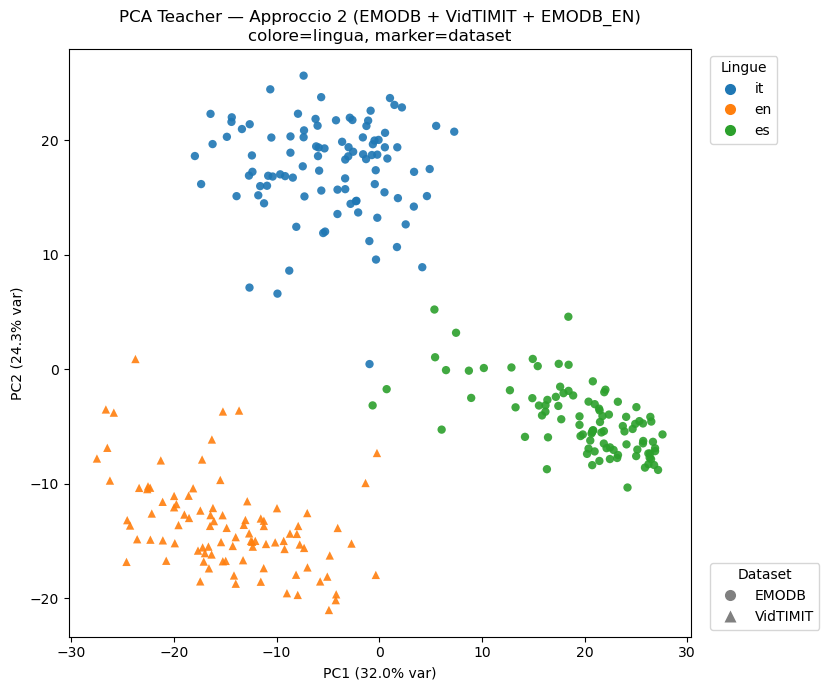

Figure 2D: fig_pca_app2_emodb_en_labels/pca_app2_2D_emodb_en_labels.pdf | fig_pca_app2_emodb_en_labels/pca_app2_2D_emodb_en_labels.png
[3D] Explained variance: PC1=32.0%  PC2=24.3%  PC3=5.3%  (tot=61.6%)
[3D] Silhouette globale: 0.650


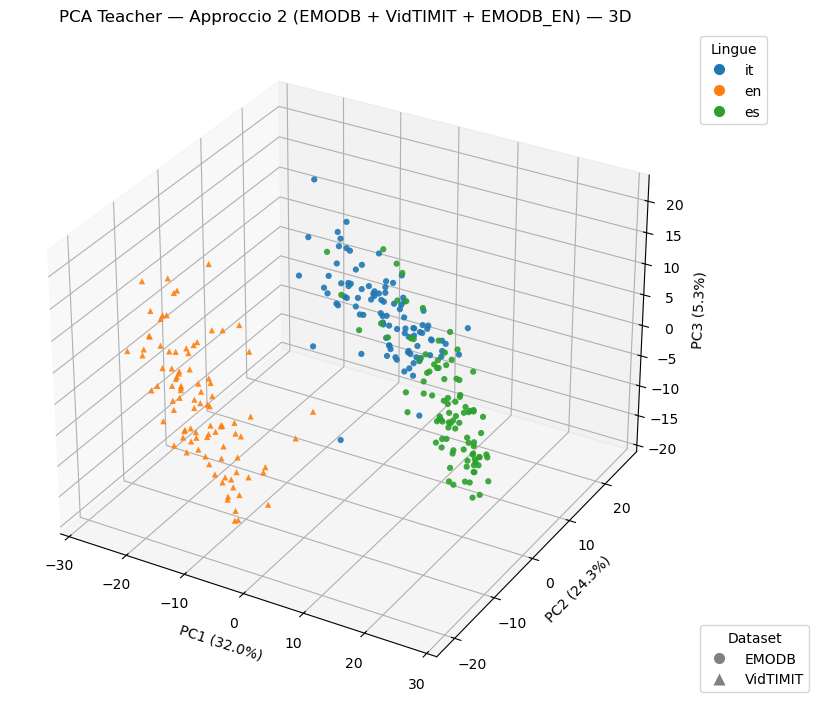

Figure 3D: fig_pca_app2_emodb_en_labels/pca_app2_3D_emodb_en_labels.pdf | fig_pca_app2_emodb_en_labels/pca_app2_3D_emodb_en_labels.png


In [35]:
# -*- coding: utf-8 -*-
# PCA Teacher — Approccio 2 (EMODB + VidTIMIT + EMODB_EN) robusto
# - Colori fissi per lingua: it=blu, en=arancione, es=verde
# - Marker = dataset
# - PCA 2D + 3D
# - Etichette 3-digit opzionali per EN di EMODB/EMODB_EN
# - Metriche: explained variance, silhouette (globale + per lingua), separability J

import os, os.path as op, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

# ===================== CONFIG =====================
CSV = {
    "EMODB":     "NEWEMODB/distillation_dataset_filtrato.csv",
    "VidTIMIT":  "VidTIMIT/distillation_dataset.csv",
    #"EMODB_EN":  "NEWEMODB/manifest_en_only_neutro.csv",
}

FILTER_LANGS       = ["en", "it", "es"]   # <- metti None per evitare filtri
EMB_KIND           = "feat"               # 'feat' oppure 'hid'
FORCE_COL = {                             
    "EMODB":     "feat_path",
    "VidTIMIT":  "feat_path",
    "EMODB_EN":  "feat_path",
}

L2_NORMALIZE       = True
CENTER_BY_DATASET  = False
DROP_TOP_BY_NORM   = 0
DROP_TOP_BY_PC1    = 3

SHOW_LABELS_2D     = True
SHOW_LABELS_3D     = True
LABEL_FONT_SIZE    = 9
LABEL_JITTER       = 0.35
LABEL_DATASETS_FOR_CODES = ["EMODB", "EMODB_EN"]

RANDOM_STATE       = 0
OUT_DIR            = "fig_pca_app2_emodb_en_labels"
os.makedirs(OUT_DIR, exist_ok=True)
# ==================================================

def find_col(df, candidates):
    m = {c.lower(): c for c in df.columns}
    for cand in candidates:
        for k, orig in m.items():
            if cand in k:
                return orig
    return None

def resolve_path_multi(p, csv_path):
    """
    Risolve p provando, in ordine:
      1) assoluto
      2) relativo alla cartella del CSV
      3) relativo alla CWD
      4) /mnt/data/<p> (preservando sottocartelle)
      5) /mnt/data/<basename>
    Evita duplicazioni tipo NEWEMODB/NEWEMODB/...
    """
    if not isinstance(p, str) or not p.strip():
        return None
    p_rel = Path(p).expanduser()
    if p_rel.is_absolute():
        return str(p_rel) if p_rel.exists() else None

    csv_dir = Path(csv_path).parent

    # 1) relativo alla cartella del CSV (attenzione al doppio prefisso)
    try1 = (csv_dir / p_rel)
    if p_rel.parts and csv_dir.name.lower() == p_rel.parts[0].lower():
        if p_rel.exists():
            return str(p_rel)
    if try1.exists():
        return str(try1)

    # 2) relativo alla CWD
    try2 = Path.cwd() / p_rel
    if try2.exists():
        return str(try2)

    # 3) /mnt/data/<p> (mantieni sottodirectory)
    try3 = Path("/mnt/data") / p_rel
    if try3.exists():
        return str(try3)

    # 4) fallback basename
    try4 = Path("/mnt/data") / p_rel.name
    if try4.exists():
        return str(try4)

    return None

def pick_embedding_column(df, ds_name):
    forced = FORCE_COL.get(ds_name)
    if forced and forced in df.columns:
        return forced
    candidates = [
        "feat_path", "features_path",
        "layer11_mean_path", "layer10_mean_path",
        "hid_path", "hidden_path", "hidden_mean_path",
        "embedding_path"
    ]
    npy_cols = [c for c in df.columns if str(df[c].iloc[0] if len(df) else "").endswith(".npy")]
    for c in candidates + npy_cols + list(df.columns):
        if c in df.columns:
            v = str(df[c].iloc[0]) if len(df) else ""
            if v.endswith(".npy") or any(k in c.lower() for k in ["feat","hid","layer10","layer11","embed"]):
                return c
    return None

def normalize_lang(val: str):
    if val is None or (isinstance(val, float) and np.isnan(val)):
        return None
    s = str(val).strip().lower()
    repl = {
        "eng":"en", "english":"en", "en-us":"en", "en_gb":"en",
        "ita":"it", "italian":"it",
        "esp":"es", "spa":"es", "spanish":"es"
    }
    s = repl.get(s, s)
    if s not in {"en","it","es"}:
        m = re.search(r"(?:^|[_\-/])(en|it|es)(?:[_\-/]|$)", s)
        if m: s = m.group(1)
    return s

def speaker_code_from_filename(fname: str) -> str:
    stem = Path(fname).stem
    m = re.match(r"(\d{3})[\-_]", stem)
    if m: return m.group(1)
    m = re.search(r"(\d{3})", stem)
    return m.group(1) if m else stem[:3]

def separability_J(X, y):
    classes = np.unique(y)
    D = X.shape[1]
    mu = X.mean(axis=0)
    Sw = np.zeros((D, D), dtype=float)
    Sb = np.zeros((D, D), dtype=float)
    for c in classes:
        Xc = X[y == c]
        if Xc.shape[0] < 2:
            continue
        muc = Xc.mean(axis=0)
        Cc  = Xc - muc
        Sw += Cc.T @ Cc
        diff = (muc - mu).reshape(-1,1)
        Sb += Xc.shape[0] * (diff @ diff.T)
    return float(np.trace(Sb) / (np.trace(Sw) + 1e-9))

def load_dataset(ds_name, csv_path):
    if not op.exists(csv_path):
        alt = str(Path("/mnt/data") / Path(csv_path).name)
        if op.exists(alt):
            csv_path = alt
        else:
            raise FileNotFoundError(csv_path)

    df = pd.read_csv(csv_path)

    label_col   = find_col(df, ["label","lang","language"])
    dataset_col = find_col(df, ["dataset","source"])
    if dataset_col is None:
        df["dataset"] = ds_name; dataset_col = "dataset"

    # Normalizza/inferisci lingue
    if label_col is None:
        if ds_name == "EMODB_EN":
            df["label"] = "en"; label_col = "label"
        else:
            guess_col = find_col(df, ["mouth","video","file","path"])
            if guess_col is not None:
                df["label"] = df[guess_col].astype(str).map(normalize_lang)
                label_col = "label"
    else:
        df[label_col] = df[label_col].map(normalize_lang)

    if label_col is None:
        df["label"] = "other"; label_col = "label"

    if FILTER_LANGS is not None:
        df = df[df[label_col].isin(FILTER_LANGS)].copy()

    emb_col = pick_embedding_column(df, ds_name)
    if emb_col is None:
        print(f"[{ds_name}] Nessuna colonna embedding valida in {csv_path} — SKIP")
        return None

    csv_abs = str(Path(csv_path).resolve())
    X, y, d, files = [], [], [], []
    n_rows = len(df)
    n_ok = 0
    for _, r in df.iterrows():
        p = r.get(emb_col, None)
        if isinstance(p, str) and p.strip():
            rp = resolve_path_multi(p, csv_abs)
            if rp and Path(rp).exists():
                arr = np.load(rp)
                x = arr.mean(axis=0) if arr.ndim > 1 else arr
                X.append(x.astype(np.float32))
                y.append(str(r[label_col]).strip())
                d.append(ds_name)
                files.append(Path(rp).name)
                n_ok += 1
                continue
        for alt in ["layer11_mean_path","layer10_mean_path","feat_path","hid_path"]:
            if alt == emb_col or alt not in df.columns:
                continue
            p2 = r.get(alt, None)
            if isinstance(p2, str) and p2.strip():
                rp2 = resolve_path_multi(p2, csv_abs)
                if rp2 and Path(rp2).exists():
                    arr = np.load(rp2)
                    x = arr.mean(axis=0) if arr.ndim > 1 else arr
                    X.append(x.astype(np.float32))
                    y.append(str(r[label_col]).strip())
                    d.append(ds_name)
                    files.append(Path(rp2).name)
                    n_ok += 1
                    break

    if n_ok == 0:
        print(f"[{ds_name}] WARNING: nessun embedding caricato da {csv_path} (righe={n_rows}). SKIP")
        return None

    X = np.vstack(X); y = np.array(y, str); d = np.array(d, str); files = np.array(files, str)
    print(f"[{ds_name}] {Path(csv_path).name} | usati={len(X)} | dim={X.shape[1]} | uniq label={pd.Series(y).unique().tolist()}")
    return X, y, d, files

# --------- LOAD ---------
Xs, Ys, Ds, Fs = [], [], [], []
for name, path in CSV.items():
    loaded = load_dataset(name, path)
    if loaded is None:
        continue
    Xi, yi, di, fi = loaded
    Xs.append(Xi); Ys.append(yi); Ds.append(di); Fs.append(fi)

if not Xs:
    raise RuntimeError("Nessun dataset contiene embedding leggibili. Controlla path e colonne *feat/hid/layer*_mean_path.")

X = np.vstack(Xs); y = np.concatenate(Ys); d = np.concatenate(Ds); files = np.concatenate(Fs)

# --------- OPTIONAL DROPs ---------
if DROP_TOP_BY_NORM > 0:
    norms = np.linalg.norm(X, axis=1)
    idx = np.argsort(norms)[::-1][:DROP_TOP_BY_NORM]
    keep = np.ones(len(X), bool); keep[idx] = False
    X, y, d, files = X[keep], y[keep], d[keep], files[keep]
    print(f"Drop-by-norm: rimossi {len(idx)} -> {keep.sum()} rimanenti")

if L2_NORMALIZE:
    X = X / (np.linalg.norm(X, axis=1, keepdims=True) + 1e-8)
    print("L2 normalization: ON")

if CENTER_BY_DATASET:
    Xc = np.empty_like(X)
    for nm in np.unique(d):
        m = (d == nm)
        mu = X[m].mean(axis=0); sd = X[m].std(axis=0, ddof=0) + 1e-8
        Xc[m] = (X[m] - mu) / sd
    X = Xc
    print("Per-dataset standardization: ON")

if DROP_TOP_BY_PC1 > 0:
    Ztmp = StandardScaler().fit_transform(X)
    pc1 = PCA(n_components=1, random_state=RANDOM_STATE).fit(Ztmp).components_[0]
    scores = Ztmp @ pc1
    idx = np.argsort(np.abs(scores))[::-1][:DROP_TOP_BY_PC1]
    keep = np.ones(len(X), bool); keep[idx] = False
    X, y, d, files = X[keep], y[keep], d[keep], files[keep]
    print(f"Drop-by-PC1: rimossi {len(idx)} -> {keep.sum()} rimanenti")

# --------- PCA 2D ---------
Xz  = StandardScaler().fit_transform(X)
pca2 = PCA(n_components=2, random_state=RANDOM_STATE)
Z2   = pca2.fit_transform(Xz)
ev2  = pca2.explained_variance_ratio_ * 100

# ===== Metriche (2D) =====
n_classes = len(np.unique(y))
sil_overall_2d = float(silhouette_score(Z2, y)) if n_classes > 1 else float("nan")
sil_samp = silhouette_samples(Z2, y) if n_classes > 1 else np.full(len(y), np.nan)
sil_per_lang_2d = {lg: float(np.mean(sil_samp[y == lg])) for lg in np.unique(y)}

J_feat = separability_J(Xz, y)
J_pca2 = separability_J(Z2, y)

print(f"[2D] Explained variance: PC1={ev2[0]:.1f}%, PC2={ev2[1]:.1f}%, Tot={ev2.sum():.1f}%")
print(f"[2D] Silhouette globale: {sil_overall_2d:.3f}")
for lg, v in sil_per_lang_2d.items():
    print(f"[2D] Silhouette {lg}: {v:.3f}")
print(f"[2D] Separability J (feature std): {J_feat:.3f}")
print(f"[2D] Separability J (PCA 2D):     {J_pca2:.3f}")

rows = [
    {"metric":"explained_PC1","space":"PCA2D","value":float(ev2[0])},
    {"metric":"explained_PC2","space":"PCA2D","value":float(ev2[1])},
    {"metric":"explained_total","space":"PCA2D","value":float(ev2.sum())},
    {"metric":"silhouette_overall","space":"PCA2D","value":sil_overall_2d},
    {"metric":"separability_J","space":"features_std","value":J_feat},
    {"metric":"separability_J","space":"PCA2D","value":J_pca2},
]
for lg, v in sil_per_lang_2d.items():
    rows.append({"metric":f"silhouette_{lg}","space":"PCA2D","value":v})
pd.DataFrame(rows).to_csv(op.join(OUT_DIR, "metrics_app2.csv"), index=False)

# --------- Plot 2D ---------
langs    = list(dict.fromkeys(y))
datasets = list(dict.fromkeys(d))

# Palette fissa per lingue (come screenshot)
LANG_COLORS = {"it": "#1f77b4", "en": "#ff7f0e", "es": "#2ca02c"}  # blu, arancione, verde
def color_for(lg): 
    return LANG_COLORS.get(lg, "#7f7f7f")  # default grigio per lingue inattese

markers  = ["o","^","s","D","P","X","v","<",">","*","h","+","x"]
m_map    = {ds: markers[i % len(markers)] for i, ds in enumerate(datasets)}

fig, ax = plt.subplots(figsize=(8.4, 7.0))
for lg in langs:
    for ds_name in datasets:
        m = (y == lg) & (d == ds_name)
        if not np.any(m): 
            continue
        ax.scatter(Z2[m,0], Z2[m,1],
                   c=[color_for(lg)], marker=m_map[ds_name],
                   alpha=0.9, edgecolor='none')

# Etichette (SOLO se abilitate)
if SHOW_LABELS_2D:
    m_lab = np.isin(d, LABEL_DATASETS_FOR_CODES) & (y == "en")
    rng = np.random.RandomState(0)
    for i in np.where(m_lab)[0]:
        code = speaker_code_from_filename(files[i])
        jx = (rng.rand()-0.5)*LABEL_JITTER
        jy = (rng.rand()-0.5)*LABEL_JITTER
        ax.text(Z2[i,0]+jx, Z2[i,1]+jy, code, fontsize=LABEL_FONT_SIZE,
                weight='bold', ha='center', va='center')

ax.set_xlabel(f"PC1 ({ev2[0]:.1f}% var)")
ax.set_ylabel(f"PC2 ({ev2[1]:.1f}% var)")
ax.set_title("PCA Teacher — Approccio 2 (EMODB + VidTIMIT + EMODB_EN)\ncolore=lingua, marker=dataset")

# Legende separate
lang_order = [lg for lg in ["it","en","es"] if lg in set(langs)]
lang_h = [plt.Line2D([0],[0], marker='o', linestyle='',
                     markerfacecolor=LANG_COLORS[lg], markeredgecolor='none',
                     markersize=8, label=lg) for lg in lang_order]
leg1 = ax.legend(handles=lang_h, title="Lingue", loc="upper left", bbox_to_anchor=(1.02,1.0))
ax.add_artist(leg1)

ds_h = [plt.Line2D([0],[0], marker=m_map[dsn], linestyle='',
                   markerfacecolor='gray', markeredgecolor='none',
                   markersize=8, label=dsn) for dsn in datasets]
ax.legend(handles=ds_h, title="Dataset", loc="lower left", bbox_to_anchor=(1.02,0.0))

plt.tight_layout()
out2_pdf = op.join(OUT_DIR, "pca_app2_2D_emodb_en_labels.pdf")
out2_png = op.join(OUT_DIR, "pca_app2_2D_emodb_en_labels.png")
plt.savefig(out2_pdf, bbox_inches="tight")
plt.savefig(out2_png, dpi=220, bbox_inches="tight")
plt.show()
print("Figure 2D:", out2_pdf, "|", out2_png)

# --------- PCA 3D ---------
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
pca3 = PCA(n_components=3, random_state=RANDOM_STATE)
Z3 = pca3.fit_transform(Xz)
ev3 = pca3.explained_variance_ratio_ * 100
sil_overall_3d = float(silhouette_score(Z3, y)) if n_classes > 1 else float("nan")

print(f"[3D] Explained variance: PC1={ev3[0]:.1f}%  PC2={ev3[1]:.1f}%  PC3={ev3[2]:.1f}%  (tot={ev3.sum():.1f}%)")
print(f"[3D] Silhouette globale: {sil_overall_3d:.3f}")

fig = plt.figure(figsize=(8.8, 7.2))
ax3 = fig.add_subplot(111, projection='3d')
for lg in langs:
    for ds_name in datasets:
        m = (y == lg) & (d == ds_name)
        if not np.any(m): 
            continue
        ax3.scatter(Z3[m,0], Z3[m,1], Z3[m,2],
                    c=[color_for(lg)], marker=m_map[ds_name],
                    alpha=0.9, edgecolor='none')

if SHOW_LABELS_3D:
    m_lab = np.isin(d, LABEL_DATASETS_FOR_CODES) & (y == "en")
    rng = np.random.RandomState(0)
    for i in np.where(m_lab)[0]:
        code = speaker_code_from_filename(files[i])
        jx = (rng.rand()-0.5)*LABEL_JITTER
        jy = (rng.rand()-0.5)*LABEL_JITTER
        jz = (rng.rand()-0.5)*LABEL_JITTER
        ax3.text(Z3[i,0]+jx, Z3[i,1]+jy, Z3[i,2]+jz, code,
                 fontsize=LABEL_FONT_SIZE, weight='bold')

ax3.set_xlabel(f"PC1 ({ev3[0]:.1f}%)")
ax3.set_ylabel(f"PC2 ({ev3[1]:.1f}%)")
ax3.set_zlabel(f"PC3 ({ev3[2]:.1f}%)")
ax3.set_title("PCA Teacher — Approccio 2 (EMODB + VidTIMIT + EMODB_EN) — 3D")

# Legende separate
lang_h = [plt.Line2D([0],[0], marker='o', linestyle='',
                     markerfacecolor=LANG_COLORS[lg], markeredgecolor='none',
                     markersize=8, label=lg) for lg in lang_order]
leg1 = plt.legend(handles=lang_h, title="Lingue", loc="upper left", bbox_to_anchor=(1.02,1.0))
ax3.add_artist(leg1)

ds_h = [plt.Line2D([0],[0], marker=m_map[dsn], linestyle='',
                   markerfacecolor='gray', markeredgecolor='none',
                   markersize=8, label=dsn) for dsn in datasets]
plt.legend(handles=ds_h, title="Dataset", loc="lower left", bbox_to_anchor=(1.02,0.0))

plt.tight_layout()
out3_pdf = op.join(OUT_DIR, "pca_app2_3D_emodb_en_labels.pdf")
out3_png = op.join(OUT_DIR, "pca_app2_3D_emodb_en_labels.png")
plt.savefig(out3_pdf, bbox_inches="tight")
plt.savefig(out3_png, dpi=220, bbox_inches="tight")
plt.show()
print("Figure 3D:", out3_pdf, "|", out3_png)


In [38]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
L2-only KD (multi-livello) – Confronto pulito:
- Baseline: NO KD
- L2 (top/mid/both) + variante "light" (warm-up + applicazione stocastica)

Valutazioni:
  • In-domain (VAL)
  • Cross-domain su un dominio A (tutto / L1 it+es / L2 en)
  • EN L1 (train+val) vs EN L2 (dominio B diverso da A)

NOTE
- Se USE_L2_ML=True, il CSV di train dovrebbe avere (almeno per alcune righe)
  le colonne: layer10_mean_path, layer11_mean_path. Se assenti, il codice
  degrada a "nessuna L2" per quelle righe (maschera i None).
"""

import os, csv, random, contextlib, warnings
from pathlib import Path
import numpy as np, pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision.transforms as T
from torchvision.models.video import r3d_18, R3D_18_Weights
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.optim import AdamW
from torch.optim.lr_scheduler import OneCycleLR
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, precision_recall_fscore_support

# ───────────── Config base ─────────────
SEED = 42
EPOCHS = 40
BATCH_SIZE = 8
LR, WD = 3e-4, 1e-3
NUM_WORKERS = 0

LANGS = ['en','it','es']
OUT_H, OUT_W, L = 64, 64, 32
MIXUP_ALPHA = 0.30
PATIENCE = 7
MAX_LR = 3e-4
DIV_FACTOR = 10
FINAL_DIV = 100

# Datasets (train/val)
TRAIN_CSV = "NEWEMODB/manifest_train.csv"
VAL_CSV   = "NEWEMODB/manifest_test_session1.csv"

# === DOMINI DI TEST =========================================
# Cross-domain (tutto/L1/L2) – dominio A
CROSS_DOMAIN_CSV = "BABELE/manifest_test.csv"

# L1 vs L2: EN_L2 viene da questo dominio B (DIVERSO da cross-domain),
# EN_L1 viene da TRAIN+VAL del dominio di training
L1L2_DOMAIN_CSV  = "EMODB/manifest_test.csv"
# ============================================================

# Device & AMP
DEVICE = torch.device('cuda' if torch.cuda.is_available() else ('mps' if torch.backends.mps.is_available() else 'cpu'))
AMP_ENABLED = (DEVICE.type == 'cuda')
PIN_MEMORY = (DEVICE.type == 'cuda')

random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
torch.backends.cudnn.benchmark = True

# ───────────── Lettura CSV “robusta” ─────────────
def robust_read_csv(path, usecols=None):
    """
    Prova read_csv standard; se fallisce, autodetect del separatore
    e rilegge saltando le righe malformate.
    """
    try:
        return pd.read_csv(path, usecols=usecols)
    except pd.errors.ParserError:
        # Autodetect separatore su un campione
        with open(path, 'r', encoding='utf-8', errors='ignore') as fh:
            sample = fh.read(8192)
        try:
            dialect = csv.Sniffer().sniff(sample, delimiters=[',',';','\t','|'])
            sep = dialect.delimiter
        except Exception:
            sep = ','
        print(f"[WARN] ParserError su {os.path.basename(path)} → rileggo con engine='python', sep='{sep}', on_bad_lines='skip'")
        return pd.read_csv(path, sep=sep, engine='python',
                           quotechar='"', escapechar='\\',
                           on_bad_lines='skip', usecols=usecols)

# (opzionale) normalizza un manifest “sporco” in uno pulito
def normalize_manifest(in_path, out_path):
    df = robust_read_csv(in_path)
    df['mouth_path'] = df['mouth_path'].astype(str).str.strip().str.strip('"').str.strip("'")
    df['label']      = df['label'].astype(str).str.strip().str.lower()
    df = df[(df['mouth_path'].notna()) & (df['mouth_path']!="")]
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    df.to_csv(out_path, index=False)
    print(f"Manifest normalizzato → {out_path}  (righe: {len(df)})")

# ───────────── Utility ─────────────
def macro_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average="macro") if len(y_true) else 0.0

# ───────────── Augmentazioni ─────────────
class SpecAug3D:
    def __init__(self, H, W, T_mask=4, S_mask=4):
        self.tf = T.Compose([
            T.ToPILImage(),
            T.RandomResizedCrop((H,W), scale=(0.95,1.0), ratio=(1.0,1.0)),
            T.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
            T.RandomHorizontalFlip(0.5),
            T.ToTensor(),
        ])
        self.T_mask, self.S_mask = T_mask, S_mask
    def __call__(self, vid):
        frames = []
        for f in vid:
            img = (f*255).byte()
            t   = self.tf(img).squeeze(0)
            frames.append(t)
        vid = torch.stack(frames)
        L_,H,W = vid.shape
        if L_ > self.T_mask:
            t0 = random.randrange(0, L_-self.T_mask+1)
            vid[t0:t0+self.T_mask] = 0
        if H>self.S_mask and W>self.S_mask:
            fi = random.randrange(0, L_)
            h0 = random.randrange(0, H-self.S_mask+1)
            w0 = random.randrange(0, W-self.S_mask+1)
            vid[fi,h0:h0+self.S_mask,w0:w0+self.S_mask] = 0
        return vid

class RandomErasing3D:
    def __init__(self, p=0.3, size=(8,8,8)):
        self.p = p; self.d, self.h, self.w = size
    def __call__(self, vid):
        if random.random()>self.p: return vid
        L_,H,W = vid.shape
        sd = random.randint(0, max(0, L_-self.d))
        sh = random.randint(0, max(0, H-self.h))
        sw = random.randint(0, max(0, W-self.w))
        vid[sd:sd+self.d, sh:sh+self.h, sw:sw+self.w] = 0
        return vid

def mixup_return_params(x, y_onehot, alpha=MIXUP_ALPHA):
    if alpha <= 0:
        B = x.size(0); idx = torch.arange(B, device=x.device); lam = 1.0
        return x, y_onehot, lam, idx
    lam = np.random.beta(alpha, alpha)
    idx = torch.randperm(x.size(0), device=x.device)
    x_m = lam*x + (1-lam)*x[idx]
    y_m = lam*y_onehot + (1-lam)*y_onehot[idx]
    return x_m, y_m, float(lam), idx

# ───────────── Loss ─────────────
class SoftFocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0):
        super().__init__(); self.alpha, self.gamma = alpha, gamma
    def forward(self, logits, y_soft):
        logp = F.log_softmax(logits,1)
        p    = logp.exp()
        ce   = -(y_soft * logp).sum(1)
        pt   = (y_soft * p).sum(1)
        return ( self.alpha * (1-pt)**self.gamma * ce ).mean()

# ───────────── MixStyle ─────────────
class MixStyle(nn.Module):
    def __init__(self, p=0.3, α=0.1):
        super().__init__(); self.p, self.α = p, α
    def forward(self, x):
        if not self.training or random.random()>self.p:
            return x
        B,C = x.shape
        mu  = x.mean(1,keepdim=True)
        sig = (x.var(1,keepdim=True)+1e-6).sqrt()
        lm  = np.random.beta(self.α, self.α)
        perm= torch.randperm(B,device=x.device)
        mu2, sig2 = mu[perm], sig[perm]
        x_norm = (x-mu)/sig
        return x_norm*(lm*sig + (1-lm)*sig2) + (lm*mu + (1-lm)*mu2)

# ───────────── Dataset ─────────────
TEACHER_L10_COL = "layer10_mean_path"
TEACHER_L11_COL = "layer11_mean_path"

class MouthDS(Dataset):
    def __init__(self,csv,L=32,augment=False,need_teacher=False):
        df = robust_read_csv(csv)
        # pulizia base
        if "mouth_path" not in df.columns or "label" not in df.columns:
            raise ValueError(f"{csv}: mancano colonne essenziali 'mouth_path' e/o 'label'.")
        df["mouth_path"] = df["mouth_path"].astype(str).str.strip().str.strip('"').str.strip("'")
        df["label"]      = df["label"].astype(str).str.lower().str.strip()
        df = df[(df["mouth_path"].notna()) & (df["mouth_path"]!="")].reset_index(drop=True)
        # se servono teacher, garantisci le colonne (anche vuote)
        if need_teacher:
            if TEACHER_L10_COL not in df.columns: df[TEACHER_L10_COL] = None
            if TEACHER_L11_COL not in df.columns: df[TEACHER_L11_COL] = None
        # filtra file esistenti
        miss = ~df["mouth_path"].map(os.path.exists)
        if miss.any():
            print(f"[WARN] {miss.sum()} file mancanti in {os.path.basename(csv)} (saranno ignorati).")
            df = df.loc[~miss].reset_index(drop=True)

        self.df, self.L = df, L
        self.l2i         = {l:i for i,l in enumerate(LANGS)}
        self.spec        = SpecAug3D(OUT_H,OUT_W) if augment else None
        self.randomerase = RandomErasing3D()      if augment else None
        self.need_teacher = need_teacher

    def _align(self,a):
        T0 = a.shape[0]
        if T0>=self.L: idx = np.linspace(0,T0-1,self.L).astype(int)
        else:          idx = np.concatenate([np.arange(T0), np.full(self.L-T0, T0-1)])
        return a[idx]
    def __len__(self): return len(self.df)

    def __getitem__(self,i):
        r = self.df.iloc[i]
        # ROI bocca
        a = np.load(r.mouth_path,allow_pickle=True).astype('float32')/255.
        if a.ndim==4 and a.shape[-1]==3: a = a.mean(-1)
        a = self._align(a)
        v = torch.from_numpy(a)
        if self.spec:        v = self.spec(v)
        if self.randomerase: v = self.randomerase(v)
        v5 = v.unsqueeze(0).unsqueeze(0)
        v5 = F.interpolate(v5, size=(self.L,OUT_H,OUT_W), mode='trilinear', align_corners=False)
        x  = (v5 - 0.5)/0.5
        x  = x.squeeze(0)                     # [1, L, H, W]
        y  = torch.tensor(self.l2i[str(r.label).lower()],dtype=torch.long)

        if not self.need_teacher:
            return x, y

        # teacher features (possono mancare → None)
        l10 = l11 = None
        p10 = r.get(TEACHER_L10_COL, None)
        p11 = r.get(TEACHER_L11_COL, None)
        if isinstance(p10,str) and os.path.exists(p10):
            l10 = torch.from_numpy(np.load(p10)).float()
        if isinstance(p11,str) and os.path.exists(p11):
            l11 = torch.from_numpy(np.load(p11)).float()
        return x, y, l10, l11

def collate_with_optional_teacher(batch):
    """Restituisce (x,y,l10_list,l11_list) con elementi None mantenuti come placeholder."""
    xs, ys, l10s, l11s = [], [], [], []
    for item in batch:
        if len(item)==4:
            x,y,l10,l11 = item
        else:
            x,y = item; l10=l11=None
        xs.append(x); ys.append(y); l10s.append(l10); l11s.append(l11)
    x = torch.stack(xs,0)
    y = torch.stack(ys,0)
    return x, y, l10s, l11s

# ───────────── Model ─────────────
class Student(nn.Module):
    def __init__(self, proj_dim=128):
        super().__init__()
        self.backbone = r3d_18(weights=R3D_18_Weights.DEFAULT)
        self.backbone.fc = nn.Identity()
        self.mixstyle   = MixStyle(p=0.3, α=0.1)
        self.proj_v     = nn.Sequential(nn.LayerNorm(512), nn.Linear(512, proj_dim))
        self.head       = nn.Sequential(nn.LayerNorm(512), nn.Linear(512,256), nn.GELU(), nn.Dropout(0.1),
                                        nn.Linear(256,len(LANGS)))
    def forward(self, x):
        x = x.repeat(1,3,1,1,1)
        f = self.backbone(x)      # [B,512]
        f = self.mixstyle(f)
        logits = self.head(f)
        z_v = self.proj_v(f)      # [B,proj]
        return logits, f, z_v

# ───────────── Sampler ─────────────
def make_sampler(df):
    df = df.copy()
    df['label'] = df['label'].astype(str).str.lower()
    cnt = df['label'].value_counts().reindex(LANGS,fill_value=0).to_dict()
    w   = df['label'].map(lambda l:1.0/(cnt.get(l,0)+1e-6)).tolist()
    return WeightedRandomSampler(w, num_samples=len(w), replacement=True)

# ───────────── Loader builder ─────────────
def build_loaders(train_csv, val_csv, need_teacher):
    df_tr = robust_read_csv(train_csv)
    dl_tr = DataLoader(MouthDS(train_csv, L, augment=True,  need_teacher=need_teacher),
                       batch_size=BATCH_SIZE,
                       sampler=make_sampler(df_tr),
                       num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY,
                       collate_fn=collate_with_optional_teacher)
    dl_va = DataLoader(MouthDS(val_csv,   L, augment=False, need_teacher=False),
                       batch_size=BATCH_SIZE, shuffle=False,
                       num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY)
    return dl_tr, dl_va

# ───────────── Eval helpers ─────────────
def evaluate_manifest(csv_path, ckpt_path, title=""):
    model = Student().to(DEVICE)
    state = torch.load(ckpt_path, map_location=DEVICE)
    model.load_state_dict(state, strict=False)
    for m in model.backbone.modules():
        if isinstance(m, nn.BatchNorm3d):
            m.eval(); m.weight.requires_grad_(False); m.bias.requires_grad_(False)
    model.eval()

    dl = DataLoader(MouthDS(csv_path, L, augment=False, need_teacher=False),
                    batch_size=BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=PIN_MEMORY)
    y_true, y_pred = [], []
    with torch.no_grad():
        for x,y in dl:
            x = x.to(DEVICE); y = y.to(DEVICE)
            logits, _, _ = model(x)
            y_true += y.cpu().tolist()
            y_pred += logits.argmax(1).cpu().tolist()
    all_labels = list(range(len(LANGS)))
    acc = accuracy_score(y_true, y_pred) if len(y_true) else 0.0
    mf1 = macro_f1(y_true, y_pred)
    cm  = confusion_matrix(y_true, y_pred, labels=all_labels) if len(y_true) else np.zeros((len(LANGS),len(LANGS)), dtype=int)
    print(f"\n[{title}] N={len(y_true)}  Acc={acc:.3f}  Macro-F1={mf1:.3f}")
    print(pd.DataFrame(cm, index=LANGS, columns=LANGS))
    return mf1, acc

def split_domain_L1_L2(csv_path):
    """Genera split L1=it+es, L2=en per un dominio generico (salva due CSV) e ritorna (all, L1, L2)."""
    df = robust_read_csv(csv_path)
    df['mouth_path'] = df['mouth_path'].astype(str).str.strip().str.strip('"').str.strip("'")
    df['label']      = df['label'].astype(str).str.lower().str.strip()
    df = df[(df['mouth_path'].notna()) & (df['mouth_path']!="")].reset_index(drop=True)
    l2 = df[df['label']=='en']
    l1 = df[df['label'].isin(['it','es'])]
    p_all = csv_path
    p_l1  = os.path.splitext(csv_path)[0] + "__L1_it_es.csv"
    p_l2  = os.path.splitext(csv_path)[0] + "__L2_en.csv"
    l1[['mouth_path','label']].to_csv(p_l1, index=False)
    l2[['mouth_path','label']].to_csv(p_l2, index=False)
    return p_all, p_l1, p_l2

def build_enL1_from_trainval(train_csv, val_csv, out_csv="reports/EN_L1_from_TRAINVAL.csv"):
    os.makedirs(os.path.dirname(out_csv), exist_ok=True)
    dft = robust_read_csv(train_csv); dfv = robust_read_csv(val_csv)
    df  = pd.concat([dft, dfv], ignore_index=True)
    df['mouth_path'] = df['mouth_path'].astype(str).str.strip().str.strip('"').str.strip("'")
    df['label']      = df['label'].astype(str).str.lower().str.strip()
    df  = df[df['label']=='en'][['mouth_path','label']].reset_index(drop=True)
    if len(df)==0: raise ValueError("Nessuna riga 'en' trovata in TRAIN+VAL.")
    df.to_csv(out_csv, index=False)
    return out_csv

def build_en_from_domain(csv_path, out_csv):
    os.makedirs(os.path.dirname(out_csv), exist_ok=True)
    df = robust_read_csv(csv_path)
    df['mouth_path'] = df['mouth_path'].astype(str).str.strip().str.strip('"').str.strip("'")
    df['label']      = df['label'].astype(str).str.lower().str.strip()
    df = df[df['label']=='en'][['mouth_path','label']].reset_index(drop=True)
    if len(df)==0: raise ValueError(f"Nessuna riga 'en' in {csv_path}")
    df.to_csv(out_csv, index=False)
    return out_csv

def _collect_en_scores(csv_path, ckpt_path, run_dir=None, tag=""):
    model = Student().to(DEVICE)
    state = torch.load(ckpt_path, map_location=DEVICE)
    model.load_state_dict(state, strict=False)
    for m in model.backbone.modules():
        if isinstance(m, nn.BatchNorm3d):
            m.eval(); m.weight.requires_grad_(False); m.bias.requires_grad_(False)
    model.eval()

    dl = DataLoader(MouthDS(csv_path, L, augment=False, need_teacher=False),
                    batch_size=BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=PIN_MEMORY)
    en_idx = LANGS.index('en')
    probs, margins, preds = [], [], []
    with torch.no_grad():
        for x,y in dl:
            x = x.to(DEVICE)
            logits,_,_ = model(x)
            pr = F.softmax(logits,1)
            p_en = pr[:, en_idx]
            logit_en = logits[:, en_idx]
            others = torch.stack([logits[:, LANGS.index('it')], logits[:, LANGS.index('es')]], dim=1)
            margin = logit_en - others.max(dim=1).values
            pred = pr.argmax(1)
            probs.append(p_en.cpu().numpy())
            margins.append(margin.cpu().numpy())
            preds.extend((pred.cpu()==en_idx).tolist())
    probs = np.concatenate(probs) if probs else np.array([])
    margins = np.concatenate(margins) if margins else np.array([])
    acc_en = float(np.mean(preds)) if len(preds) else 0.0
    if run_dir is not None:
        os.makedirs(run_dir, exist_ok=True)
        pd.DataFrame({'p_en':probs,'margin':margins,'pred_is_en':preds}).to_csv(
            os.path.join(run_dir, f"{tag}__per_sample.csv"), index=False)
    return dict(N=len(probs), acc_en=acc_en, p_en=probs, margin=margins)

def eval_enL1_vs_enL2(enL1_csv, enL2_csv, ckpt_path, run_dir=None):
    sL1 = _collect_en_scores(enL1_csv, ckpt_path, run_dir, tag="EN_L1")
    sL2 = _collect_en_scores(enL2_csv, ckpt_path, run_dir, tag="EN_L2")
    if sL1['N'] and sL2['N']:
        y  = np.concatenate([np.ones(sL1['N']), np.zeros(sL2['N'])])
        sp = np.concatenate([sL1['p_en'], sL2['p_en']])
        sm = np.concatenate([sL1['margin'], sL2['margin']])
        auc_p = roc_auc_score(y, sp)
        auc_m = roc_auc_score(y, sm)
    else:
        auc_p = float('nan'); auc_m = float('nan')
    print("\n=== EN L1 (Train+Val) vs EN L2 (Dominio dedicato) ===")
    print(f"EN_L1: N={sL1['N']}  Acc(en)={sL1['acc_en']:.3f}  p(en) mean={np.mean(sL1['p_en']) if sL1['N'] else float('nan'):.3f}  margin mean={np.mean(sL1['margin']) if sL1['N'] else float('nan'):.3f}")
    print(f"EN_L2: N={sL2['N']}  Acc(en)={sL2['acc_en']:.3f}  p(en) mean={np.mean(sL2['p_en']) if sL2['N'] else float('nan'):.3f}  margin mean={np.mean(sL2['margin']) if sL2['N'] else float('nan'):.3f}")
    print(f"AUC p(en)={auc_p:.3f}   AUC margin={auc_m:.3f}")
    return {'Acc_en_L1': sL1['acc_en'], 'Acc_en_L2': sL2['acc_en'], 'AUC_p_en': float(auc_p),
            'AUC_margin': float(auc_m), 'N_en_L1': sL1['N'], 'N_en_L2': sL2['N']}

# ───────────── Utility: infer dims teacher una volta ─────────────
def infer_teacher_dims(csv_path):
    ds = MouthDS(csv_path, L, augment=False, need_teacher=True)
    for i in range(len(ds)):
        try:
            _, _, l10, l11 = ds[i]
            if (isinstance(l10, torch.Tensor)) and (isinstance(l11, torch.Tensor)):
                return int(l10.shape[0]), int(l11.shape[0])
        except Exception:
            continue
    return 512, 512  # fallback prudente

# ───────────── Training di UNA RUN ─────────────
def train_one_run(run_cfg):
    RUN_ID         = run_cfg['run_id']

    # L2 controls
    USE_L2_ML      = run_cfg.get('USE_L2_ML', False)
    LAMBDA_L2_TOP  = float(run_cfg.get('LAMBDA_L2_TOP', 0.0))
    LAMBDA_L2_MID  = float(run_cfg.get('LAMBDA_L2_MID', 0.0))
    L2_APPLY_PROB  = float(run_cfg.get('L2_APPLY_PROB', 1.0))   # p con cui applichi L2 per-sample
    L2_SCHEDULE    = run_cfg.get('L2_SCHEDULE', 'const')        # 'const' | 'warmup'
    L2_WARMUP_E    = int(run_cfg.get('L2_WARMUP_EPOCHS', 5))    # epoche warm-up
    PROJ_DIM       = int(run_cfg.get('PROJ_DIM', 128))

    need_teacher = USE_L2_ML
    dl_tr, dl_va = build_loaders(TRAIN_CSV, VAL_CSV, need_teacher=need_teacher)

    model = Student(proj_dim=PROJ_DIM).to(DEVICE)
    # teste L2 (student side)
    proj_l11_top = nn.Linear(512, PROJ_DIM).to(DEVICE)  # teacher top (→512 via adapter) → proj_dim
    proj_l10_mid = nn.Linear(512, 512).to(DEVICE)       # teacher mid (→512 via adapter) → 512

    # FREEZE BN
    for m in model.backbone.modules():
        if isinstance(m, nn.BatchNorm3d):
            m.eval(); m.weight.requires_grad_(False); m.bias.requires_grad_(False)

    # PRE-INIT ADAPTERS PRIMA dell'optimizer/scheduler
    if USE_L2_ML:
        d10, d11 = infer_teacher_dims(TRAIN_CSV)   # es. 768,768
        mid_adapter = (nn.Identity().to(DEVICE) if d10 == 512 else nn.Linear(d10, 512).to(DEVICE))
        top_adapter = (nn.Identity().to(DEVICE) if d11 == 512 else nn.Linear(d11, 512).to(DEVICE))
    else:
        mid_adapter = nn.Identity().to(DEVICE)
        top_adapter = nn.Identity().to(DEVICE)

    # Optimizer con TUTTI i param dentro (fix OneCycleLR)
    params = list(model.parameters()) \
           + list(proj_l11_top.parameters()) \
           + list(proj_l10_mid.parameters())
    if isinstance(top_adapter, nn.Linear): params += list(top_adapter.parameters())
    if isinstance(mid_adapter, nn.Linear): params += list(mid_adapter.parameters())
    opt   = AdamW(params, lr=LR, weight_decay=WD)

    total = EPOCHS * len(dl_tr)
    sched = OneCycleLR(opt, max_lr=MAX_LR, total_steps=total, pct_start=0.3,
                       div_factor=DIV_FACTOR, final_div_factor=FINAL_DIV, anneal_strategy='cos')
    crit  = SoftFocalLoss()

    run_name = (f"{RUN_ID}__L2{int(USE_L2_ML)}"
                f"__top{LAMBDA_L2_TOP:g}__mid{LAMBDA_L2_MID:g}"
                f"__p{L2_APPLY_PROB:g}__sched{L2_SCHEDULE}")
    ckpt_dir = os.path.join("ckpts", run_name); os.makedirs(ckpt_dir, exist_ok=True)
    best_path_student = os.path.join(ckpt_dir, "best_student.pt")
    best_path_proj_l11 = os.path.join(ckpt_dir, "best_proj_l11_top.pt")
    best_path_proj_l10 = os.path.join(ckpt_dir, "best_proj_l10_mid.pt")

    last_path_student = os.path.join(ckpt_dir, "last_student.pt")
    last_path_proj_l11 = os.path.join(ckpt_dir, "last_proj_l11_top.pt")
    last_path_proj_l10 = os.path.join(ckpt_dir, "last_proj_l10_mid.pt")

    run_dir = os.path.join("reports", run_name); os.makedirs(run_dir, exist_ok=True)
    epoch_logs = []
    best_f1, patience = 0.0, 0

    print(f"\n===== TRAIN {RUN_ID} | USE_L2_ML={USE_L2_ML}  top={LAMBDA_L2_TOP} mid={LAMBDA_L2_MID}  p={L2_APPLY_PROB}  sched={L2_SCHEDULE} =====")

    # helper per schedule
    def eff_lambda(base, ep):
        if L2_SCHEDULE == 'warmup' and L2_WARMUP_E>0:
            return float(base) * min(1.0, ep / L2_WARMUP_E)
        return float(base)

    for ep in range(1, EPOCHS+1):
        model.train(); proj_l11_top.train(); proj_l10_mid.train()
        if isinstance(top_adapter, nn.Module): top_adapter.train()
        if isinstance(mid_adapter, nn.Module): mid_adapter.train()

        sup_loss_sum = 0.0
        l2_top_sum = 0.0
        l2_mid_sum = 0.0
        cover_cnt = 0
        seen_cnt  = 0

        for x, y, l10_list, l11_list in dl_tr:
            x = x.to(DEVICE); y = y.to(DEVICE)

            # mixup
            y_onehot = F.one_hot(y, len(LANGS)).float()
            x_m, y_m, lam, idx = mixup_return_params(x, y_onehot)

            opt.zero_grad(set_to_none=True)
            amp_ctx = torch.cuda.amp.autocast if AMP_ENABLED else contextlib.nullcontext

            with amp_ctx():
                logits_m, f_m, z_v_m = model(x_m)
                loss_sup = crit(logits_m, y_m)

                # L2 losses
                l2_top = torch.tensor(0.0, device=DEVICE)
                l2_mid = torch.tensor(0.0, device=DEVICE)

                if USE_L2_ML:
                    logits_c, f_c, z_v_c = model(x)

                    B = x.size(0)
                    have = torch.tensor([ (isinstance(l10_list[i], torch.Tensor)) and (isinstance(l11_list[i], torch.Tensor))
                                          for i in range(B) ],
                                        device=DEVICE, dtype=torch.bool)
                    seen_cnt += int(B); cover_cnt += int(have.sum().item())

                    if have.any():
                        idx_keep = torch.nonzero(have).squeeze(1).tolist()
                        l10_t = torch.stack([l10_list[i2].to(DEVICE) for i2 in idx_keep], dim=0)  # [M, d10]
                        l11_t = torch.stack([l11_list[i2].to(DEVICE) for i2 in idx_keep], dim=0)  # [M, d11]

                        # adattatori verso 512
                        l10_512 = mid_adapter(l10_t)  # [M,512]
                        l11_512 = top_adapter(l11_t)  # [M,512]

                        f_sel  = f_c[have]            # [M,512]
                        z_sel  = z_v_c[have]          # [M,proj]
                        pt     = proj_l11_top(l11_512)  # [M,proj]
                        pm     = proj_l10_mid(l10_512)  # [M,512]

                        # applicazione stocastica "light"
                        if L2_APPLY_PROB < 1.0:
                            keep = (torch.rand(f_sel.size(0), device=DEVICE) < L2_APPLY_PROB)
                        else:
                            keep = torch.ones(f_sel.size(0), device=DEVICE, dtype=torch.bool)

                        if keep.any():
                            z_n  = F.normalize(z_sel[keep], dim=1)
                            pt_n = F.normalize(pt[keep],   dim=1)
                            f_n  = F.normalize(f_sel[keep], dim=1)
                            pm_n = F.normalize(pm[keep],    dim=1)

                            lam_top = eff_lambda(LAMBDA_L2_TOP, ep)
                            lam_mid = eff_lambda(LAMBDA_L2_MID, ep)

                            l2_top = F.mse_loss(z_n, pt_n) if lam_top>0 else torch.tensor(0.0, device=DEVICE)
                            l2_mid = F.mse_loss(f_n, pm_n) if lam_mid>0 else torch.tensor(0.0, device=DEVICE)

                            loss_sup = loss_sup + lam_top * l2_top + lam_mid * l2_mid

                loss = loss_sup

            loss.backward()
            torch.nn.utils.clip_grad_norm_( list(model.parameters())
                                           + list(proj_l11_top.parameters())
                                           + list(proj_l10_mid.parameters())
                                           + (list(top_adapter.parameters()) if isinstance(top_adapter, nn.Linear) else [])
                                           + (list(mid_adapter.parameters()) if isinstance(mid_adapter, nn.Linear) else []),
                                           1.0)
            opt.step(); opt.zero_grad()
            sched.step()

            with torch.no_grad():
                sup_loss_sum += float(loss_sup.item())
                l2_top_sum   += float(l2_top.item()) if isinstance(l2_top, torch.Tensor) else float(l2_top)
                l2_mid_sum   += float(l2_mid.item()) if isinstance(l2_mid, torch.Tensor) else float(l2_mid)

        # ── Validation ───────────────────────────
        model.eval()
        preds, gts = [], []
        with torch.no_grad():
            for x,y in DataLoader(MouthDS(VAL_CSV, L, augment=False, need_teacher=False),
                                  batch_size=BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=PIN_MEMORY):
                x = x.to(DEVICE); y = y.to(DEVICE)
                logits,_,_ = model(x)
                preds += logits.argmax(1).cpu().tolist()
                gts   += y.cpu().tolist()
        f1 = macro_f1(gts, preds)
        cm = confusion_matrix(gts, preds, labels=list(range(len(LANGS))))
        print(f"Epoch {ep:02d}  Val-F1={f1:.3f}")
        print(pd.DataFrame(cm, index=LANGS, columns=LANGS))

        # log per-epoca
        loss_sup_mean = sup_loss_sum / max(1, len(dl_tr))
        l2_top_mean   = l2_top_sum / max(1, len(dl_tr))
        l2_mid_mean   = l2_mid_sum / max(1, len(dl_tr))
        cover_rate    = (cover_cnt / max(1, seen_cnt)) * 100.0
        epoch_logs.append(dict(epoch=ep, val_f1=float(f1),
                               loss_sup_mean=loss_sup_mean,
                               loss_l2_top_mean=l2_top_mean,
                               loss_l2_mid_mean=l2_mid_mean,
                               teacher_cover_pct=cover_rate))
        pd.DataFrame(epoch_logs).to_csv(os.path.join(run_dir, "epoch_log.csv"), index=False)

        # early stopping
        if f1>best_f1:
            best_f1, patience = f1, 0
            torch.save(model.state_dict(), best_path_student)
            torch.save(proj_l11_top.state_dict(), best_path_proj_l11)
            torch.save(proj_l10_mid.state_dict(), best_path_proj_l10)
            print(f"  → New best: Val-F1={f1:.3f}  saved: {best_path_student}")
        else:
            patience += 1
            if patience >= PATIENCE:
                print("Early stopping"); break

    # save last
    torch.save(model.state_dict(), last_path_student)
    torch.save(proj_l11_top.state_dict(), last_path_proj_l11)
    torch.save(proj_l10_mid.state_dict(), last_path_proj_l10)

    print(f"Best Val-F1 (VAL) = {best_f1:.3f}")
    return best_path_student, run_name

# ───────────── RUN SUITE + REPORT ─────────────
def run_suite():
    # Esperimenti focalizzati su L2 (nessuna EMB-KD/InfoNCE)
    EXPERIMENTS = [
        dict(run_id="B0_noKD",
             USE_L2_ML=False, LAMBDA_L2_TOP=0.0, LAMBDA_L2_MID=0.0,
             L2_APPLY_PROB=0.0, L2_SCHEDULE='const'),

        dict(run_id="B1_L2_both",
             USE_L2_ML=True, LAMBDA_L2_TOP=1.0, LAMBDA_L2_MID=0.5,
             L2_APPLY_PROB=1.0, L2_SCHEDULE='const'),

        dict(run_id="B2_L2_top_only",
             USE_L2_ML=True, LAMBDA_L2_TOP=1.0, LAMBDA_L2_MID=0.0,
             L2_APPLY_PROB=1.0, L2_SCHEDULE='const'),

        dict(run_id="B3_L2_mid_only",
             USE_L2_ML=True, LAMBDA_L2_TOP=0.0, LAMBDA_L2_MID=0.5,
             L2_APPLY_PROB=1.0, L2_SCHEDULE='const'),

        dict(run_id="B4_L2_both_light",
             USE_L2_ML=True, LAMBDA_L2_TOP=0.5, LAMBDA_L2_MID=0.25,
             L2_APPLY_PROB=0.3, L2_SCHEDULE='warmup', L2_WARMUP_EPOCHS=5),
    ]

    # ---- domini di test
    cross_all, cross_L1, cross_L2 = split_domain_L1_L2(CROSS_DOMAIN_CSV)

    # EN_L1: EN da TRAIN+VAL (proxy madrelingua/L1)
    enL1_csv = build_enL1_from_trainval(TRAIN_CSV, VAL_CSV,
                                        out_csv="reports/EN_L1_from_TRAINVAL.csv")
    # EN_L2: EN dal dominio dedicato a L1/L2 (DIVERSO dal cross)
    enL2_csv = build_en_from_domain(L1L2_DOMAIN_CSV,
                                    out_csv="reports/EN_L2_from_L1L2DOMAIN.csv")

    if os.path.abspath(L1L2_DOMAIN_CSV) == os.path.abspath(CROSS_DOMAIN_CSV):
        print("[ATTENZIONE] L1L2_DOMAIN_CSV coincide con CROSS_DOMAIN_CSV. "
              "Per avere test separati, usa domini diversi.")

    results = []
    for cfg in EXPERIMENTS:
        best_ckpt, run_name = train_one_run(cfg)

        # Eval IN-domain (VAL)
        f1_in, acc_in = evaluate_manifest(VAL_CSV, best_ckpt, title=f"{cfg['run_id']}__IN_VAL")

        # Eval CROSS (tutto, L1, L2) — dominio di cross scelto
        f1_x_all, acc_x_all = evaluate_manifest(cross_all, best_ckpt, title=f"{cfg['run_id']}__CROSS_all")
        f1_x_L1,  acc_x_L1  = evaluate_manifest(cross_L1,  best_ckpt, title=f"{cfg['run_id']}__CROSS_L1_it_es")
        f1_x_L2,  acc_x_L2  = evaluate_manifest(cross_L2,  best_ckpt, title=f"{cfg['run_id']}__CROSS_L2_en")

        # EN L1 (TRAIN+VAL) vs EN L2 (L1L2_DOMAIN_CSV)
        run_dir = os.path.join("reports", run_name)
        en_stats = eval_enL1_vs_enL2(enL1_csv, enL2_csv, best_ckpt, run_dir=run_dir)

        results.append({
            "run": cfg['run_id'],
            "USE_L2_ML": int(cfg['USE_L2_ML']),
            "L2_top": cfg['LAMBDA_L2_TOP'],
            "L2_mid": cfg['LAMBDA_L2_MID'],
            "L2_apply_prob": cfg.get('L2_APPLY_PROB', 1.0),
            "L2_schedule": cfg.get('L2_SCHEDULE', 'const'),
            "F1_in":  float(f1_in),
            "F1_x_all": float(f1_x_all),
            "F1_x_L1": float(f1_x_L1),
            "F1_x_L2": float(f1_x_L2),
            "Acc_en_L1": en_stats['Acc_en_L1'],
            "Acc_en_L2": en_stats['Acc_en_L2'],
            "AUC_p_en":  en_stats['AUC_p_en'],
            "AUC_margin": en_stats['AUC_margin'],
        })

    df = pd.DataFrame(results)
    base = df.iloc[0]
    df["ΔF1_in_vs_baseline"]   = df["F1_in"]    - base["F1_in"]
    df["ΔF1_x_vs_baseline"]    = df["F1_x_all"] - base["F1_x_all"]
    df["ΔAcc_en_L1_vs_base"]   = df["Acc_en_L1"] - base["Acc_en_L1"]
    df["ΔAcc_en_L2_vs_base"]   = df["Acc_en_L2"] - base["Acc_en_L2"]

    print("\n================ L2-ONLY ABLATION SUMMARY ================")
    print(df.to_string(index=False))
    os.makedirs("reports", exist_ok=True)
    out_csv = "reports/kd_l2_only_ablation__crossA_enL2B.csv"
    df.to_csv(out_csv, index=False)
    print(f"\nSaved: {out_csv}")

if __name__ == "__main__":
    run_suite()


[WARN] ParserError su manifest_test_session1.csv → rileggo con engine='python', sep=',', on_bad_lines='skip'
[WARN] ParserError su manifest_test_session1.csv → rileggo con engine='python', sep=',', on_bad_lines='skip'

===== TRAIN B0_noKD | USE_L2_ML=False  top=0.0 mid=0.0  p=0.0  sched=const =====


KeyboardInterrupt: 